In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
import random
import math
import numpy as np
import itertools

# Load data

In [3]:
def load_coord(filename):
    coordinates = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                x, y = float(parts[0]), float(parts[1])
                coordinates.append([x, y])
    return np.array(coordinates)

def load_distMatrix(coords):
    num_cities = len(coords)
    G = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist = np.sqrt((coords[i][0] - coords[j][0]) ** 2 + (coords[i][1] - coords[j][1]) ** 2)
            G[i][j] = G[j][i] = dist
    return G

# Define functions

In [4]:
def cost(tour):
    total = 0
    N = len(tour)
    for i in range(N - 1):
        total += G[tour[i]][tour[i + 1]]
    total += G[tour[-1]][tour[0]]
    return total

def plot_tour(tour, cities, cost):
    x_coords = [cities[i][0] for i in tour] + [cities[tour[0]][0]]
    y_coords = [cities[i][1] for i in tour] + [cities[tour[0]][1]]

    plt.figure(figsize=(30, 15))
    plt.plot(x_coords, y_coords, color='b')
    plt.scatter(x_coords, y_coords, color='b', s=20)
    plt.scatter(x_coords[0], y_coords[0], color='red', s=100)
    plt.title(f"Cost: {cost}", fontsize = 30)
    plt.axis('off')
    plt.show()

def compare_times(func1, func2, *args, **kwargs):
    start_time = time.time()
    func1(*args, **kwargs)
    time_func1 = time.time() - start_time

    start_time = time.time()
    func2(*args, **kwargs)
    time_func2 = time.time() - start_time

    print(f"Time taken by {func1.__name__}: {time_func1:.6f} seconds")
    print(f"Time taken by {func2.__name__}: {time_func2:.6f} seconds")

def run_n_times(algorithm, graph, n=30):
    costs = []
    best_cost = float('inf')
    best_tour = None

    for _ in range(n):
        tour = algorithm(graph)
        tour_cost = cost(tour)
        costs.append(tour_cost)

        if tour_cost < best_cost:
          best_cost = tour_cost
          best_tour = tour
    res = {
        "best": np.min(costs),
        "worst": np.max(costs),
        "mean": np.mean(costs),
        "std_dev": np.std(costs)
    }
    return res, best_tour, best_cost

# Brute Force, Dynamic Programming

In [27]:
matrix = [
    [0, 8, 50, 31, 12, 48, 36, 2, 5, 39, 10],
    [8, 0, 38, 9, 33, 37, 22, 6, 4, 14, 32],
    [50, 38, 0, 11, 55, 1, 23, 46, 41, 17, 52],
    [31, 9, 11, 0, 44, 13, 16, 19, 25, 18, 42],
    [12, 33, 55, 44, 0, 54, 53, 30, 28, 45, 7],
    [48, 37, 1, 13, 54, 0, 26, 47, 40, 24, 51],
    [36, 22, 23, 16, 53, 26, 0, 29, 35, 34, 49],
    [2, 6, 46, 19, 30, 47, 29, 0, 3, 27, 15],
    [5, 4, 41, 25, 28, 40, 35, 3, 0, 20, 21]
]

G = np.array(matrix)

In [25]:
def brute_force(graph):
    num_cities = len(G)
    cities = range(num_cities)
    best_tour = None
    best_cost = float('inf')

    for route in itertools.permutations(cities):
        total_cost = 0
        for i in range(num_cities - 1):
            total_cost += graph[route[i]][route[i + 1]]
        total_cost += G[route[-1]][route[0]]

        if total_cost < best_cost:
            best_cost = total_cost
            best_tour = route

    return best_tour

In [29]:
%%time
tour = brute_force(G)
C = cost(tour)
print(f"Cost: {C}")

Cost: 120
CPU times: user 1.39 s, sys: 8.52 ms, total: 1.4 s
Wall time: 1.4 s


In [33]:
memo = {}
def dp(graph, curr, visited):
  n = len(graph)
  visited_tup = tuple(visited)

  if (curr, visited_tup) in memo:
    return memo[(curr, visited_tup)]
  if len(visited) == n:
    return visited + [0]

  best_tour = []
  min_cost = float('inf')
  for city in range(n):
    if city not in visited:
      tour = dp(graph, city, visited + [city])
      tour_cost = cost(tour)
      if tour_cost < min_cost:
        min_cost = tour_cost
        best_tour = tour

  memo[(curr, visited_tup)] = best_tour
  return best_tour

In [ ]:
%%time
tour = dp(G, 0, [0])
C = cost(tour)
print(f"Cost: {C}")

Cost: 120
CPU times: user 147 µs, sys: 0 ns, total: 147 µs
Wall time: 154 µs


In [30]:
matrix = [
    [0, 8, 50, 31, 12, 48, 36, 2, 5, 39, 10],
    [8, 0, 38, 9, 33, 37, 22, 6, 4, 14, 32],
    [50, 38, 0, 11, 55, 1, 23, 46, 41, 17, 52],
    [31, 9, 11, 0, 44, 13, 16, 19, 25, 18, 42],
    [12, 33, 55, 44, 0, 54, 53, 30, 28, 45, 7],
    [48, 37, 1, 13, 54, 0, 26, 47, 40, 24, 51],
    [36, 22, 23, 16, 53, 26, 0, 29, 35, 34, 49],
    [2, 6, 46, 19, 30, 47, 29, 0, 3, 27, 15],
    [5, 4, 41, 25, 28, 40, 35, 3, 0, 20, 21],
    [39, 14, 17, 18, 45, 24, 34, 27, 20, 0, 43]
]

G = np.array(matrix)

In [34]:
%%time
tour = brute_force(G)
C = cost(tour)
print(f"Cost: {C}")

Cost: 135
CPU times: user 17.2 s, sys: 27.2 ms, total: 17.2 s
Wall time: 17.3 s


In [35]:
%%time
tour = dp(G, 0, [0])
C = cost(tour)
print(f"Cost: {C}")

Cost: 135
CPU times: user 8.92 s, sys: 302 ms, total: 9.22 s
Wall time: 9.24 s


# 312 city dataset
(Source: https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html)

In [38]:
coords= load_coord('/content/drive/MyDrive/usca312_xy.txt')
G = load_distMatrix(coords)

# Greedy approach

In [20]:
def greedy_tsp(graph):
    n = len(graph)
    visited = [False] * n
    tour = [0]
    visited[0] = True

    curr = 0
    for _ in range(n - 1):
        nearest = None
        min_dist = float('inf')

        for city in range(n):
            if not visited[city] and graph[curr][city] < min_dist:
                    nearest = city
                    min_dist = graph[curr][city]

        tour.append(nearest)
        visited[nearest] = True
        curr = nearest

    return tour

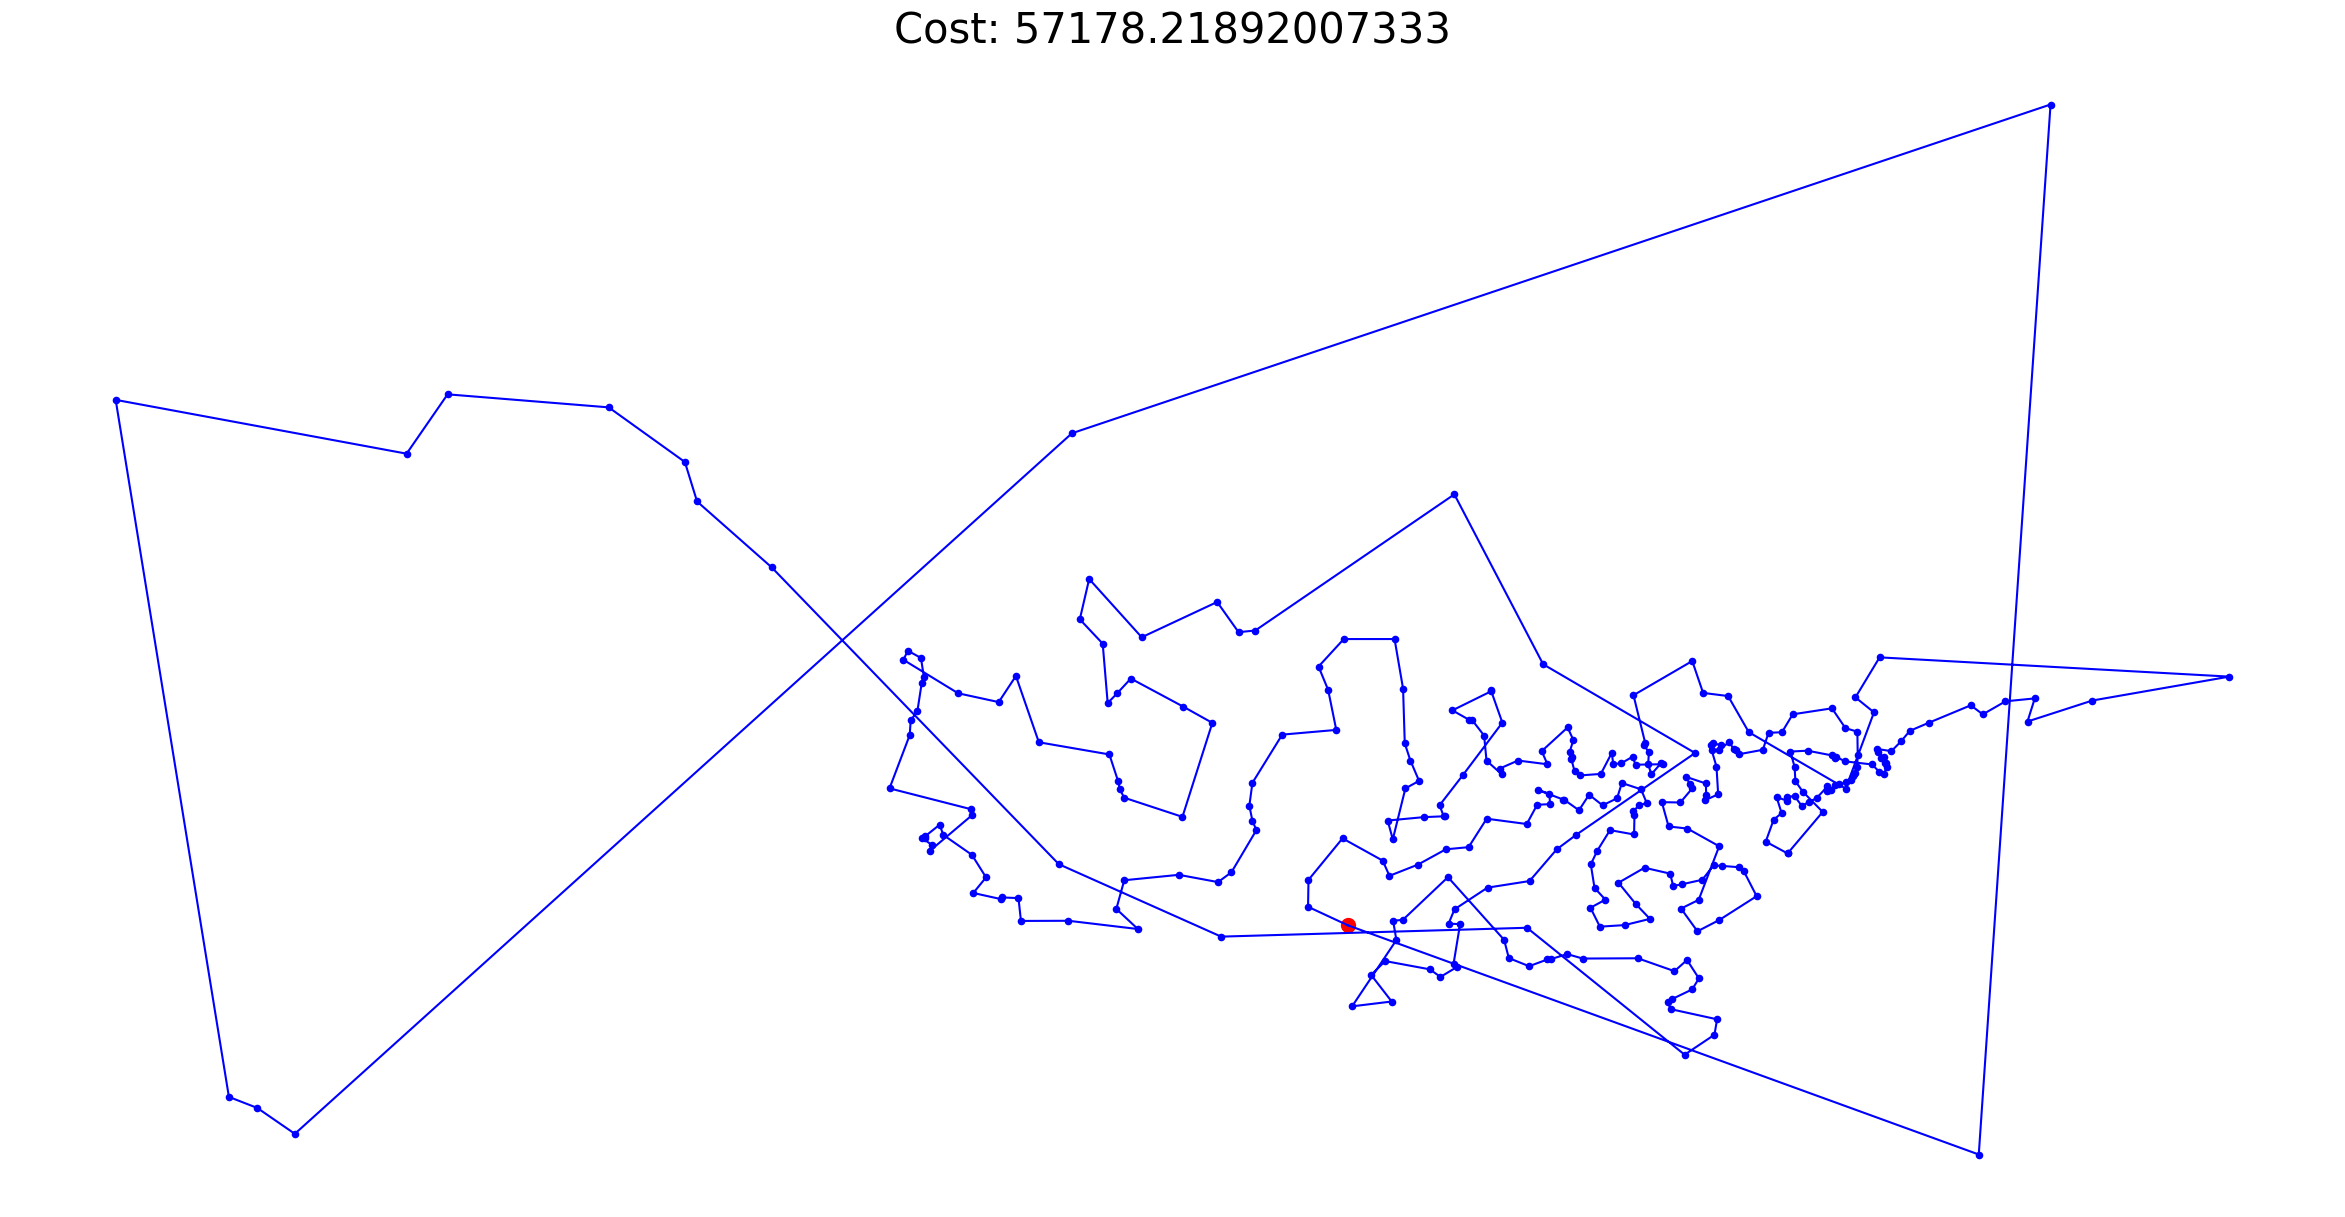

In [ ]:
tour = greedy_tsp(G)
C = cost(tour)
plot_tour(tour, coords, C)

In [16]:
def greedy_heap_tsp(graph):
    n = len(graph)
    visited = [False] * n
    tour = [0]
    visited[0] = True

    curr = 0
    for _ in range(n - 1):
        candidates = []
        for city in range(n):
            if not visited[city]:
                heapq.heappush(candidates, (graph[curr][city], city))

        _, nearest = heapq.heappop(candidates)
        tour.append(nearest)
        visited[nearest] = True
        curr = nearest

    return tour

In [40]:
compare_times(greedy_tsp, greedy_heap_tsp, G)

Time taken by greedy_tsp: 0.022646 seconds
Time taken by greedy_heap_tsp: 0.031330 seconds


# 2 opt
(Source: https://en.wikipedia.org/wiki/2-opt)

In [12]:
def two_opt(tour, graph):
    n = len(tour)
    improved = True
    while improved:
        improved = False
        for i in range(1, n - 2):
            for j in range(i + 1, n - 1):
                if graph[tour[i - 1]][tour[i]] + graph[tour[j]][tour[j + 1]] > graph[tour[i - 1]][tour[j]] + graph[tour[i]][tour[j + 1]]:
                    tour[i:j + 1] = tour[i:j + 1][::-1]
                    improved = True
    return tour

{'best': 48725.66733173037, 'worst': 54716.32467841351, 'mean': 51029.38467381977, 'std_dev': 1343.6248517895933}


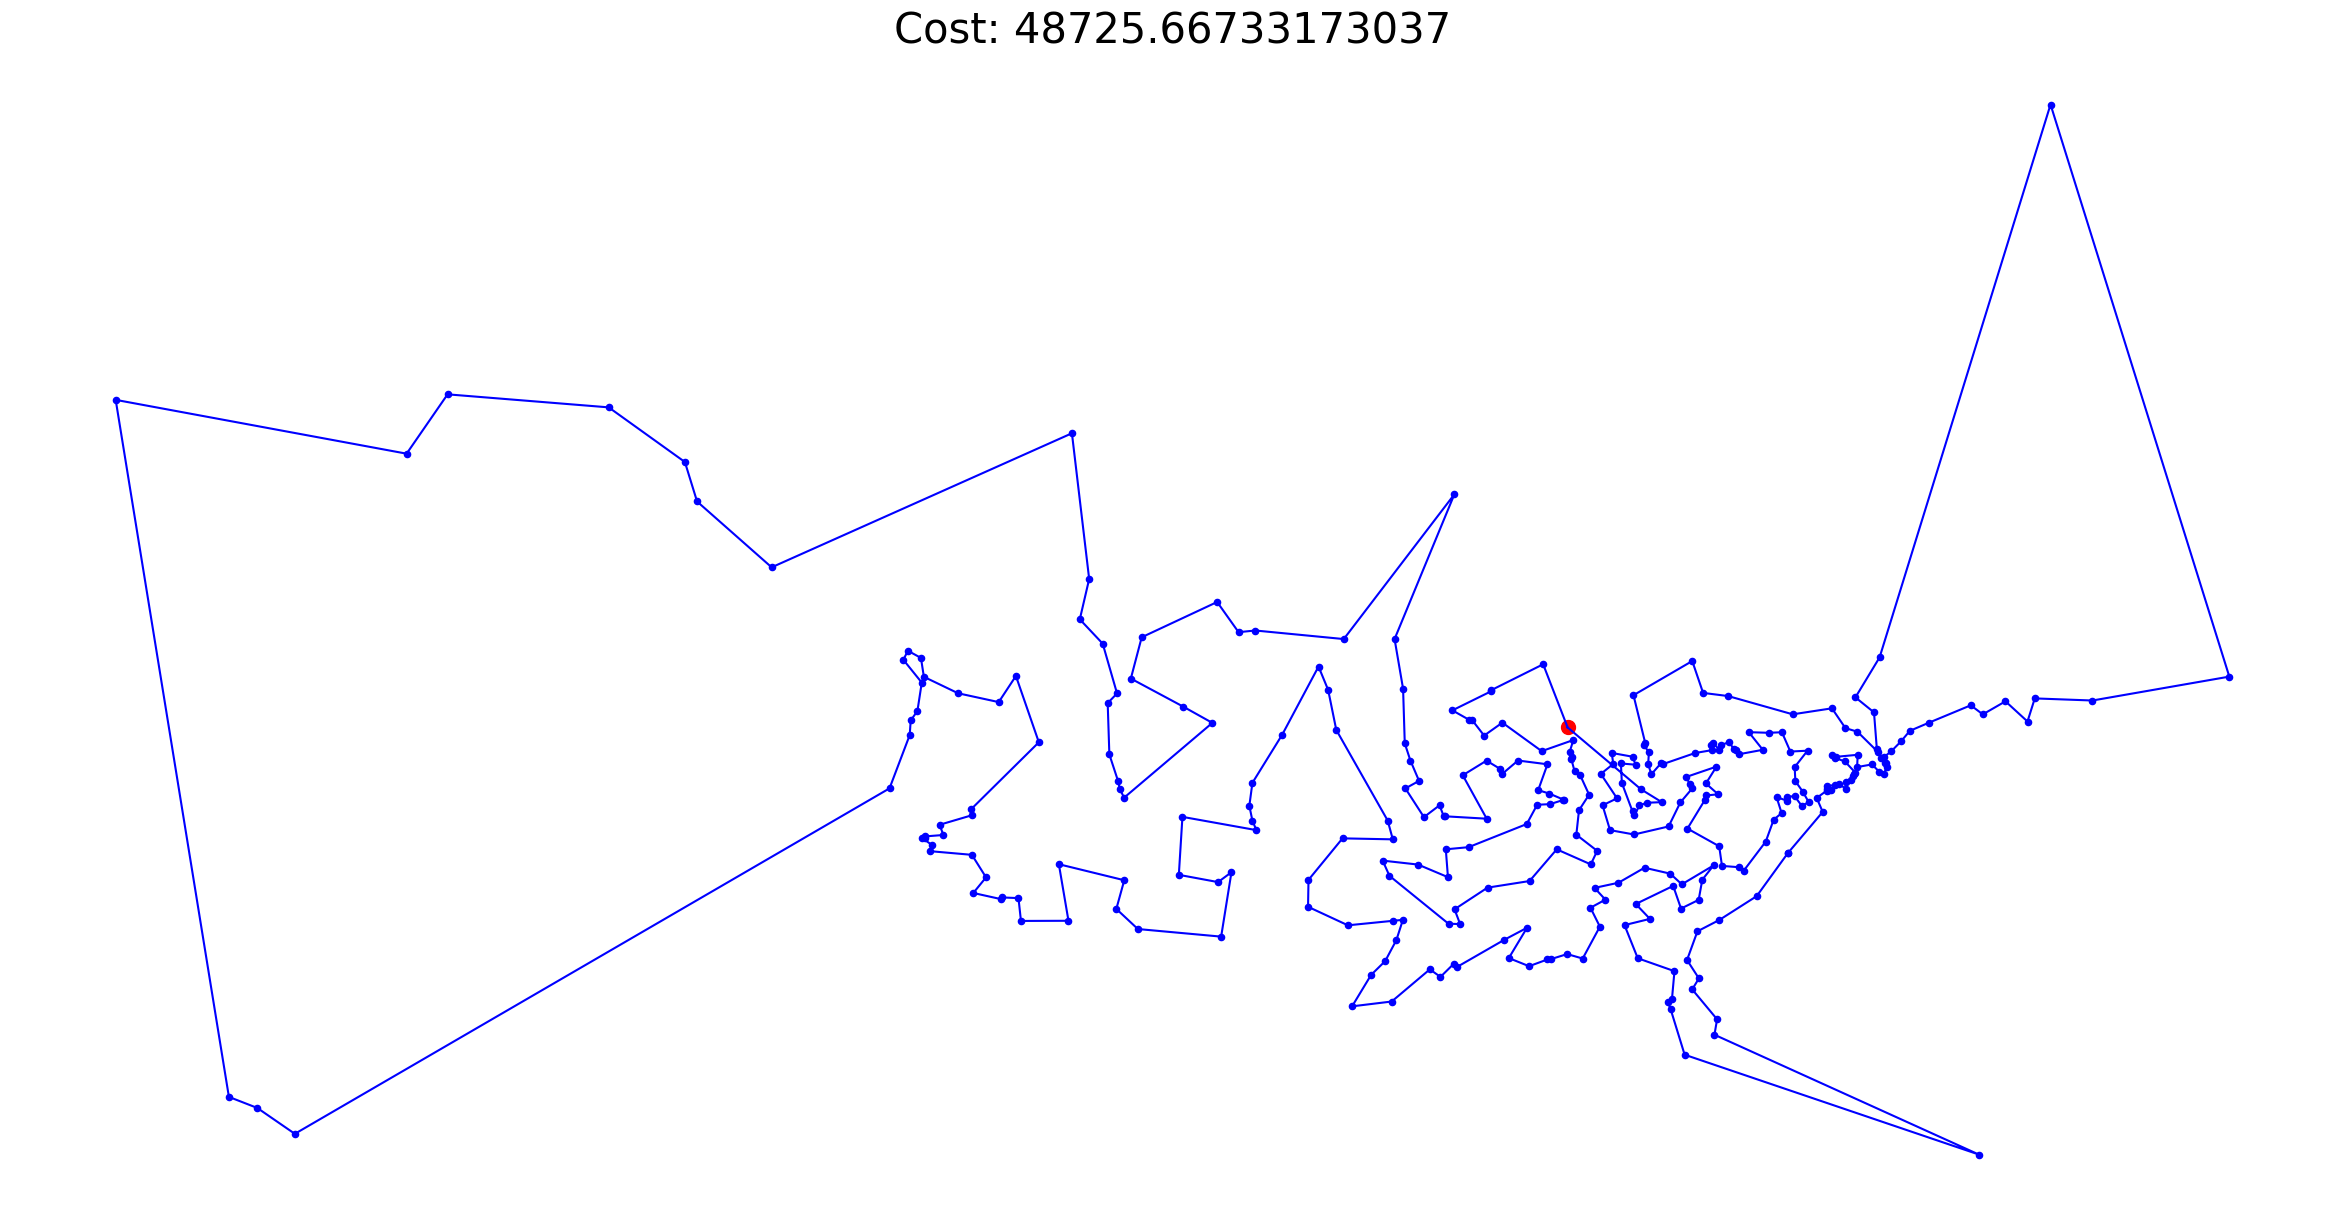

In [18]:
def random_start_2opt(graph):
  random_tour = list(range(len(G)))
  random.shuffle(random_tour)
  tour = two_opt(random_tour, graph)
  return tour

res, best_tour, best_cost = run_n_times(random_start_2opt, G)
print(res)
plot_tour(best_tour, coords, best_cost)

# 2 opt with greedy start

{'best': 52407.76629879599, 'worst': 52407.76629879599, 'mean': 52407.76629879601, 'std_dev': 1.4551915228366852e-11}


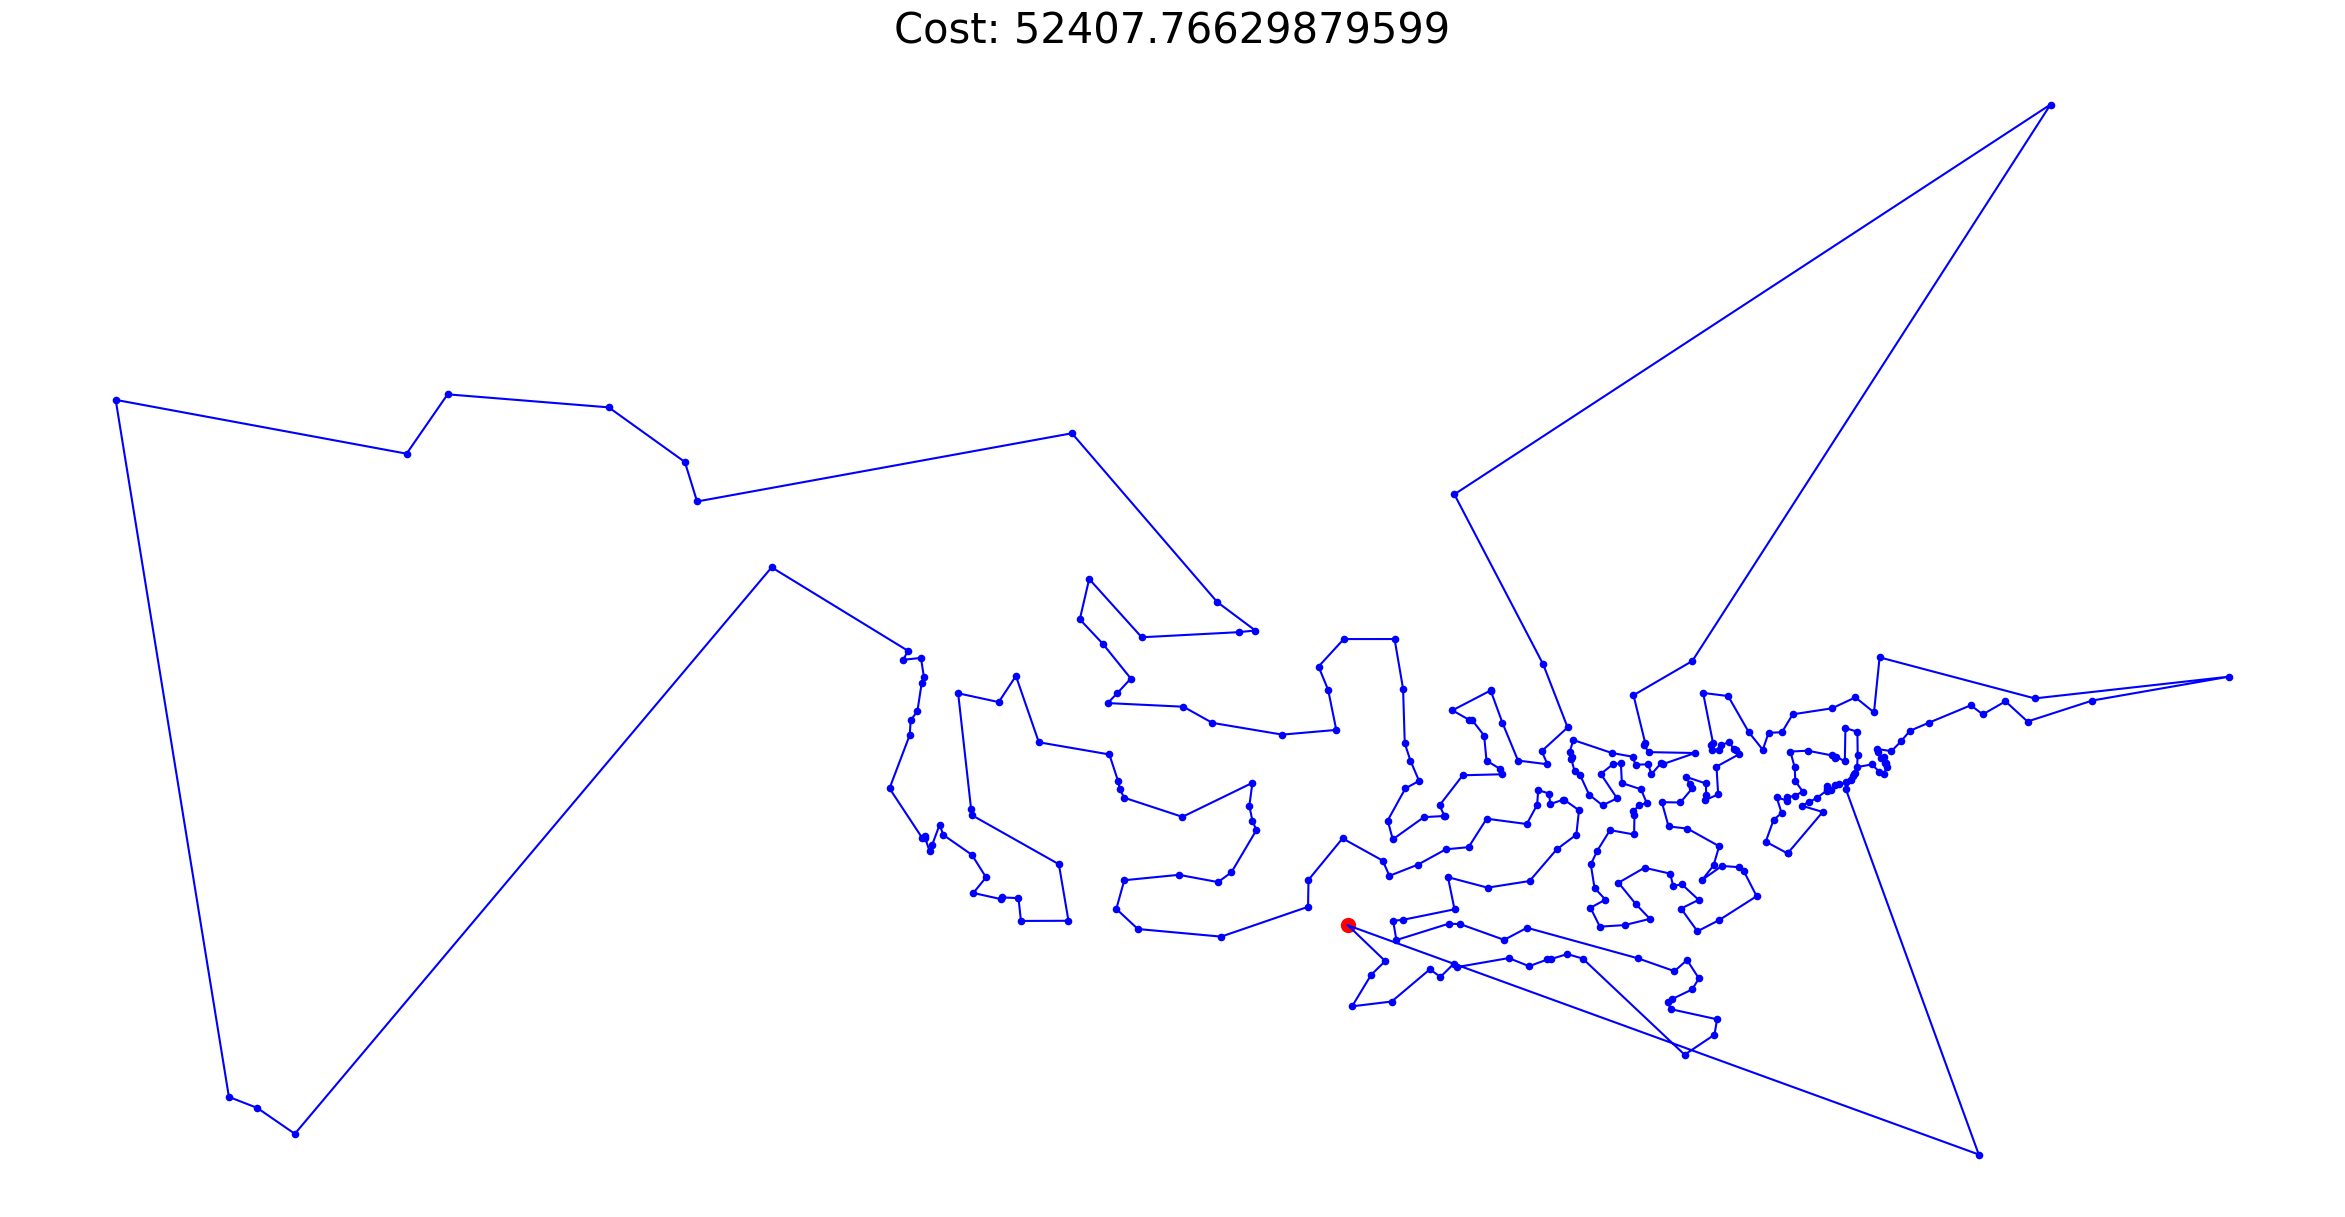

CPU times: user 10.5 s, sys: 93.4 ms, total: 10.6 s
Wall time: 10.6 s


In [22]:
%%time
def greedy2opt(graph):
  return two_opt(greedy_heap_tsp(graph), graph)

res, best_tour, best_cost = run_n_times(greedy2opt, G)
print(res)
plot_tour(best_tour, coords, best_cost)

# Simulated Annealing
(Source: https://medium.com/@francis.allanah/travelling-salesman-problem-using-simulated-annealing-f547a71ab3c6)


In [ ]:
def simulated_annealing_swap(graph, tour=None, initial_temp=50000, alpha=0.995, max_iter=10000):

  if tour is None:
    tour = list(range(len(graph)))
    random.shuffle(tour)

  def swap(tour):
    new_tour = tour[:]
    i, j = random.sample(range(len(tour)), 2)
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

  best_cost = curr_cost = cost(tour)
  best_tour = tour[:]
  temp = initial_temp
  for _ in range(max_iter):
    new_tour = swap(tour)
    new_cost = cost(new_tour)
    diff = new_cost - curr_cost
    if diff > 0:
      p = math.exp(-diff/temp)
    else:
      p = 1

    if random.random() < p:
      tour = new_tour
      curr_cost = new_cost

    if curr_cost < best_cost:
      best_cost = curr_cost
      best_tour = tour[:]

    temp *= alpha

  return best_tour

In [ ]:
%%time
res, best_tour, best_cost = run_n_times(simulated_annealing_swap, G)
print(res)

{'best': 155622.80596436554, 'worst': 186824.70676155962, 'mean': 167506.52517529947, 'std_dev': 6127.372565235087}
CPU times: user 44.8 s, sys: 118 ms, total: 45 s
Wall time: 45.7 s


In [ ]:
%%time
def SAswap_greedyStart(graph):
  return simulated_annealing_swap(greedy_heap_tsp(graph))

res, best_tour, best_cost = run_n_times(SAswap_greedyStart, G)
print(res)

{'best': 152316.20746782146, 'worst': 181924.72791784027, 'mean': 167356.62793263668, 'std_dev': 7367.036748770142}
CPU times: user 45.4 s, sys: 107 ms, total: 45.5 s
Wall time: 45.9 s


In [ ]:
# Choice of initial parameters are a whole other problem
%%time
tour = simulated_annealing_swap(G, initial_temp=3000000, alpha = 0.9995, max_iter=1000000)
print(f"Cost: {cost(tour)}")

Cost: 87926.12015284823
CPU times: user 2min 28s, sys: 282 ms, total: 2min 28s
Wall time: 2min 29s


# Greedy -> SA -> 2 opt

{'best': 48069.260692761185, 'worst': 53017.63302136881, 'mean': 50172.436551842846, 'std_dev': 1270.0830446732086}


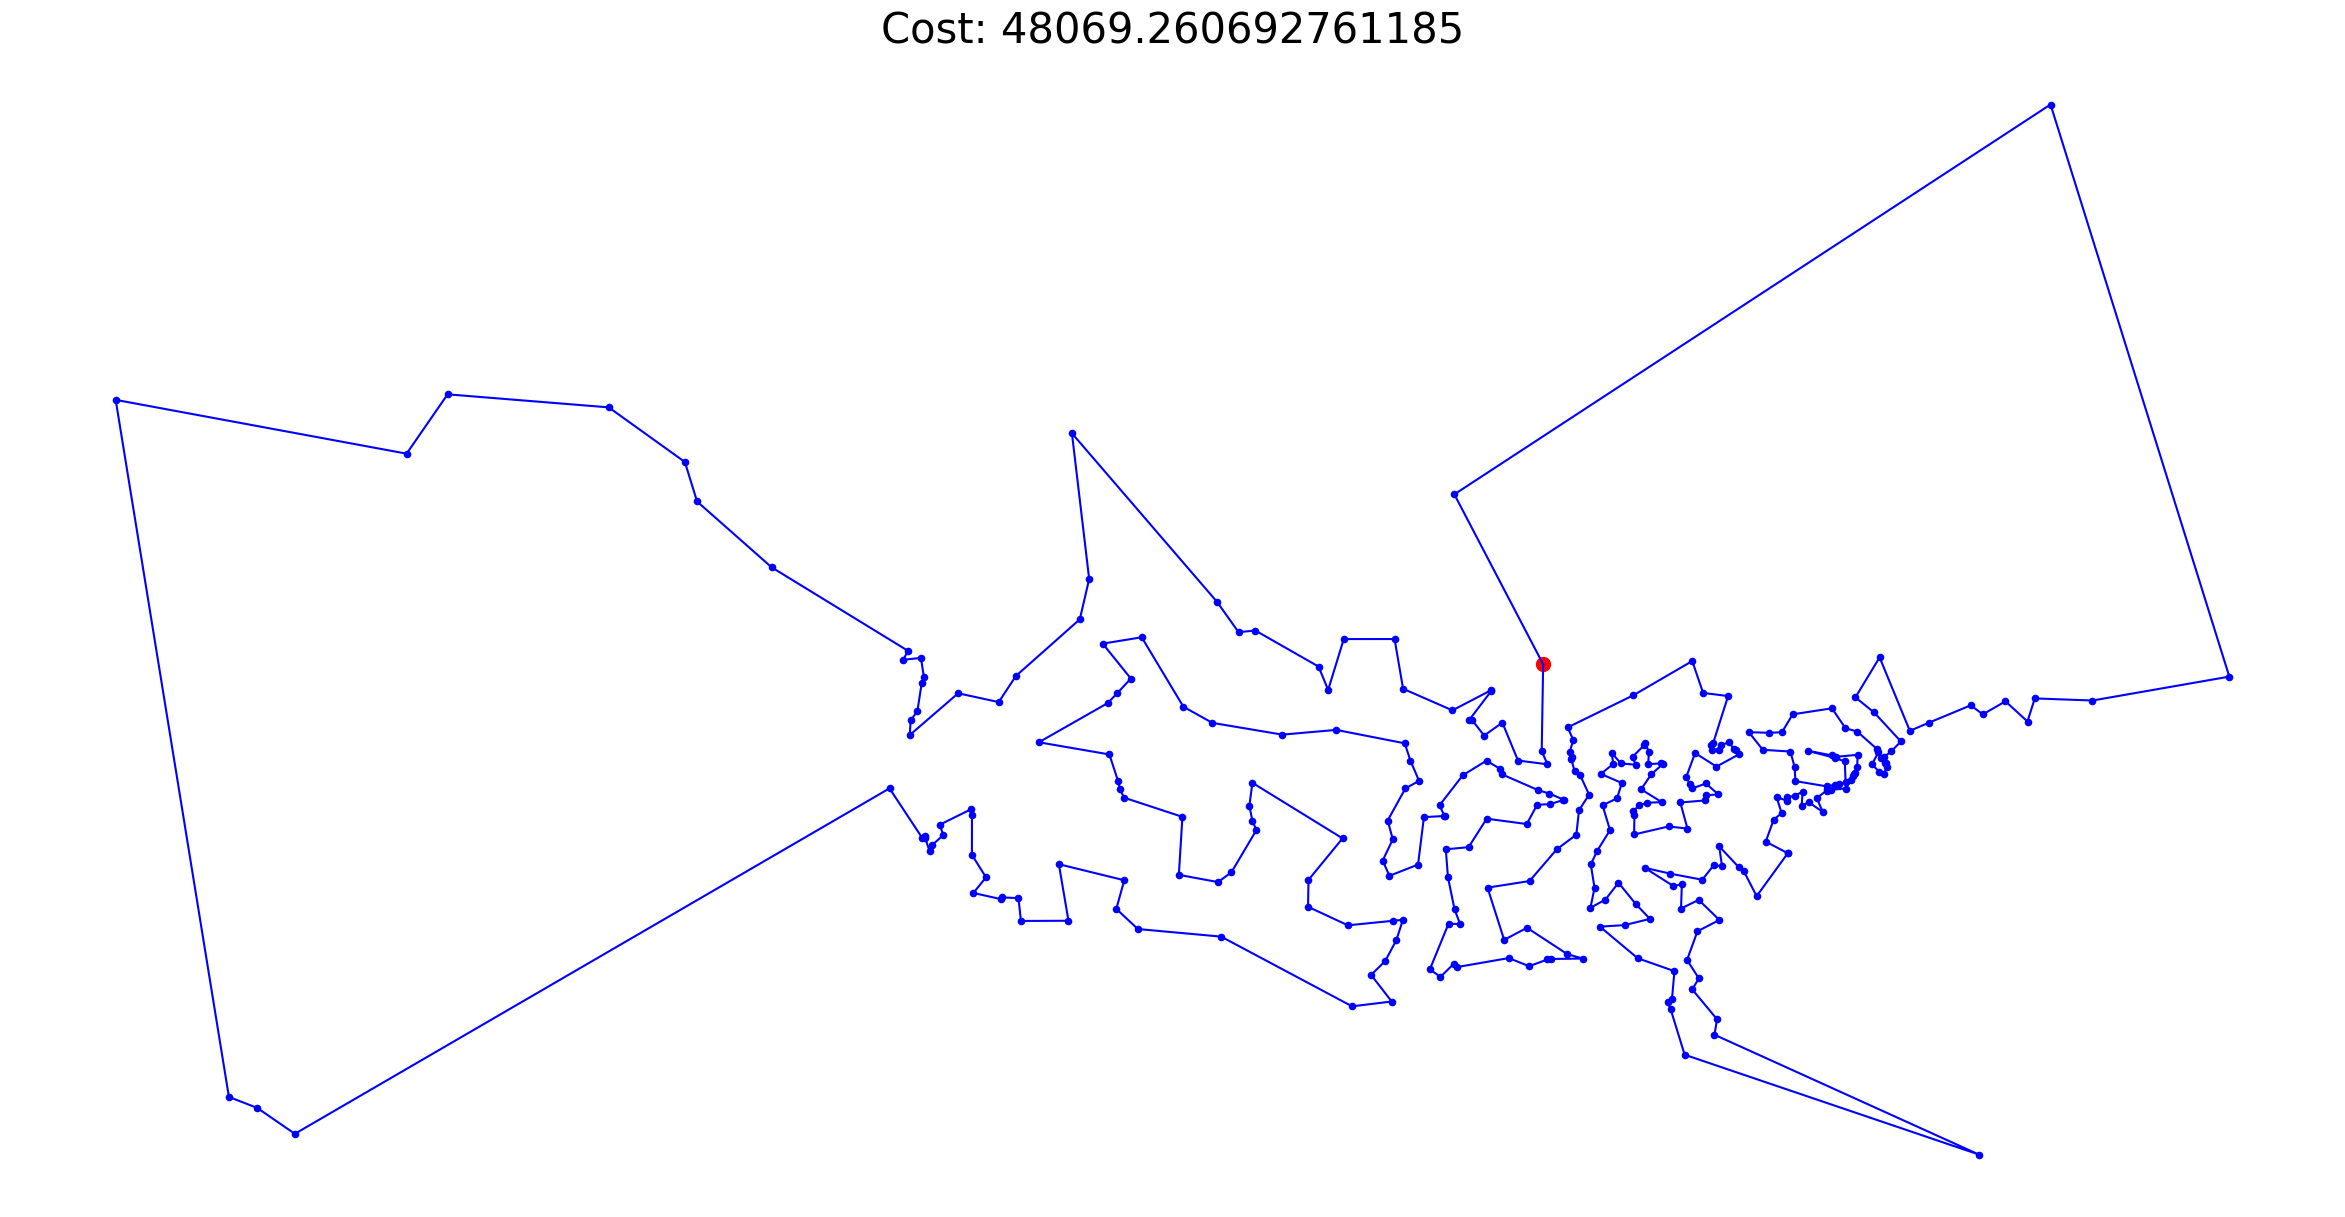

CPU times: user 1min 1s, sys: 273 ms, total: 1min 1s
Wall time: 1min 2s


In [ ]:
%%time
def greedySA2opt(graph):
  return two_opt(simulated_annealing_swap(greedy_heap_tsp(graph)),graph)

res, best_tour, best_cost = run_n_times(greedySA2opt, G)
print(res)
plot_tour(best_tour, coords, best_cost)

# Greedy -> 2opt -> SA

{'best': 154262.2722828336, 'worst': 179910.286017835, 'mean': 168312.3548542884, 'std_dev': 6563.644715168954}


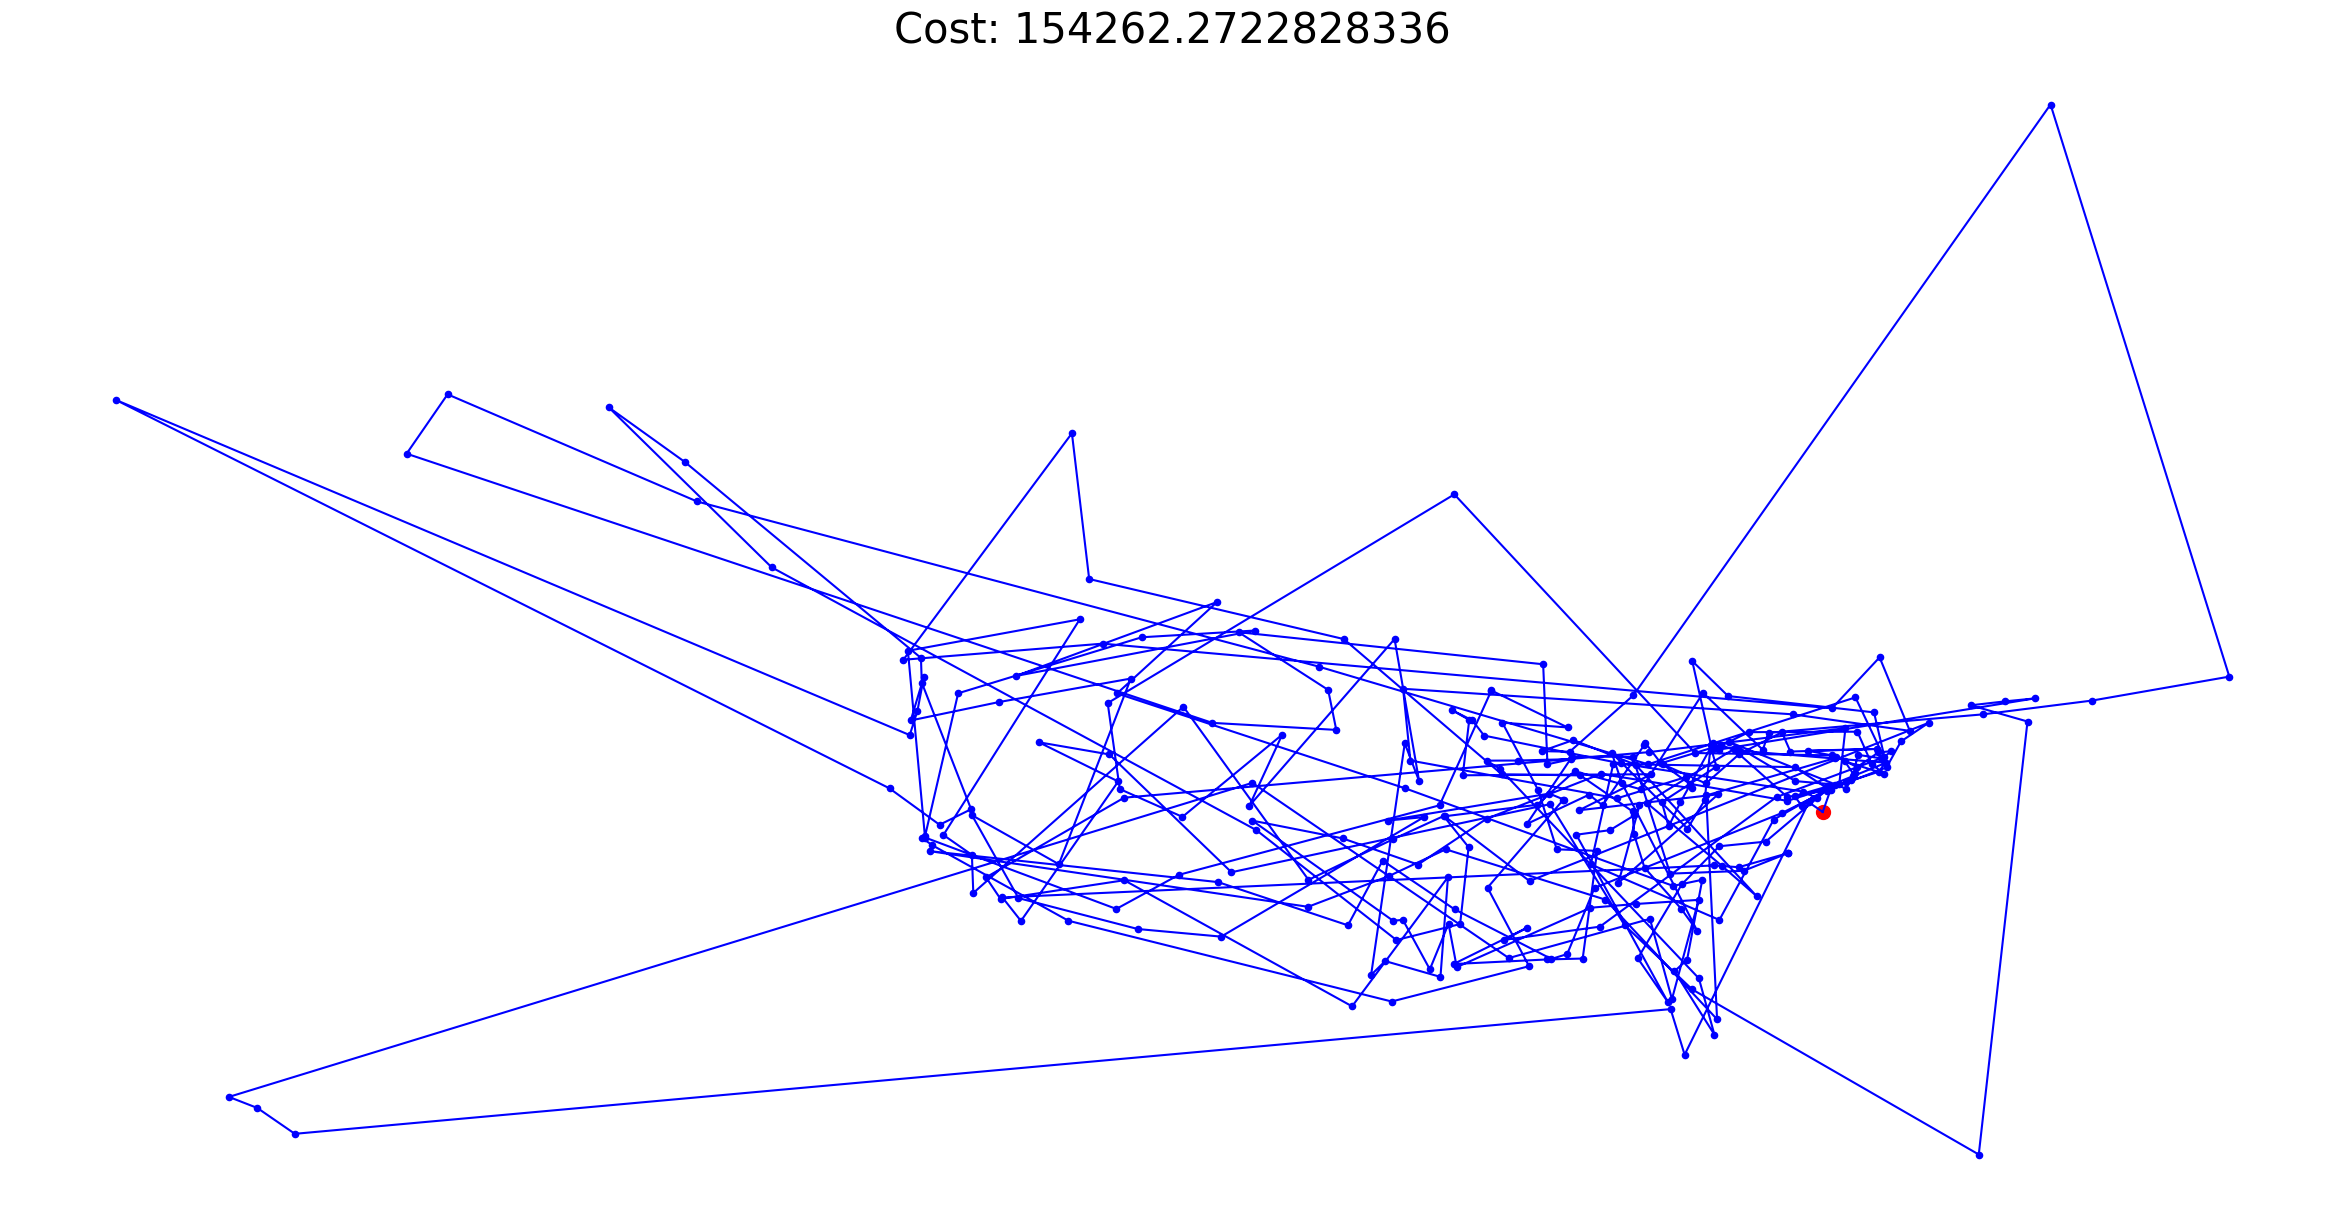

CPU times: user 56.4 s, sys: 289 ms, total: 56.7 s
Wall time: 57 s


In [ ]:
%%time
def greedy2optSA(graph):
  return simulated_annealing_swap(two_opt(greedy_heap_tsp(graph), graph))

res, best_tour, best_cost = run_n_times(greedy2optSA, G)
print(res)
plot_tour(best_tour, coords, best_cost)

# Remove and insert

In [ ]:
def simulated_annealing_remove_insert(graph, tour=None, initial_temp=50000, alpha=0.99, max_iter=10000):

  if tour is None:
    tour = list(range(len(graph)))
    random.shuffle(tour)

  def remove_insert(tour):
    new_tour = tour[:]
    i, j = random.sample(range(len(tour)), 2)
    city = new_tour.pop(i)
    new_tour.insert(j, city)
    return new_tour

  best_cost = curr_cost = cost(tour)
  best_tour = tour[:]
  temp = initial_temp
  for _ in range(max_iter):
    new_tour = remove_insert(tour)
    new_cost = cost(new_tour)
    diff = new_cost - curr_cost
    if diff > 0:
      p = math.exp(-diff/temp)
    else:
      p = 1

    if random.random() < p:
      tour = new_tour
      curr_cost = new_cost

    if curr_cost < best_cost:
      best_cost = curr_cost
      best_tour = tour[:]

    temp *= alpha

  return best_tour

In [ ]:
%%time
res, best_tour, best_cost = run_n_times(simulated_annealing_remove_insert, G)
print(res)

{'best': 143600.65510629825, 'worst': 162869.9639187759, 'mean': 153864.80870415692, 'std_dev': 4743.095885907333}
CPU times: user 44.3 s, sys: 88.8 ms, total: 44.4 s
Wall time: 44.8 s


In [ ]:
%%time
def SArmvIns_greedyStart(graph):
  return simulated_annealing_remove_insert(greedy_heap_tsp(graph))

res, best_tour, best_cost = run_n_times(SArmvIns_greedyStart, G)
print(res)

{'best': 139763.13085714146, 'worst': 164893.7668567083, 'mean': 151970.36961763087, 'std_dev': 6167.942576480858}
CPU times: user 47 s, sys: 85.8 ms, total: 47.1 s
Wall time: 48.2 s


In [ ]:
%%time
tour = simulated_annealing_remove_insert(G, initial_temp=3000000, alpha = 0.9995, max_iter=1000000)
print(f"Cost: {cost(tour)}")

Cost: 65066.58261921312
CPU times: user 2min 29s, sys: 327 ms, total: 2min 29s
Wall time: 2min 32s


# SA with 2 opt

In [ ]:
def simulated_annealing_2opt(graph, tour=None, initial_temp=50000, alpha=0.99, max_iter=10000):

  if tour is None:
    tour = list(range(len(graph)))
    random.shuffle(tour)

  def two_opt(tour):
    new_tour = tour[:]
    i, j = sorted(random.sample(range(1, len(tour)), 2))
    new_tour[i:j + 1] = new_tour[i:j + 1][::-1]
    return new_tour

  best_cost = curr_cost = cost(tour)
  best_tour = tour[:]
  temp = initial_temp
  for _ in range(max_iter):
    new_tour = two_opt(tour)
    new_cost = cost(new_tour)
    diff = new_cost - curr_cost
    if diff > 0:
      p = math.exp(-diff/temp)
    else:
      p = 1

    if random.random() < p:
      tour = new_tour
      curr_cost = new_cost

    if curr_cost < best_cost:
      best_cost = curr_cost
      best_tour = tour[:]

    temp *= alpha

  return best_tour

In [ ]:
%%time
res, best_tour, best_cost = run_n_times(simulated_annealing_2opt, G)
print(res)

{'best': 106559.91540279725, 'worst': 124064.6391157415, 'mean': 113239.23166017458, 'std_dev': 4191.304691460097}
CPU times: user 44.9 s, sys: 119 ms, total: 45 s
Wall time: 45.4 s


In [ ]:
%%time
def SA2opt_greedyStart(graph):
  return simulated_annealing_2opt(greedy_heap_tsp(graph))

res, best_tour, best_cost = run_n_times(SA2opt_greedyStart, G)
print(res)

{'best': 103461.39940182398, 'worst': 124459.72903355348, 'mean': 113520.99246502748, 'std_dev': 5205.303713077545}
CPU times: user 46.3 s, sys: 90.8 ms, total: 46.4 s
Wall time: 46.8 s


In [ ]:
%%time
tour = simulated_annealing_2opt(G, initial_temp=3000000, alpha = 0.9995, max_iter=1000000)
print(f"Cost: {cost(tour)}")

Cost: 49472.96018321236
CPU times: user 2min 33s, sys: 329 ms, total: 2min 33s
Wall time: 2min 39s


# Genetic Algorithm
(Sources:

https://medium.com/aimonks/traveling-salesman-problem-tsp-using-genetic-algorithm-fea640713758

https://itnext.io/the-genetic-algorithm-and-the-travelling-salesman-problem-tsp-31dfa57f3b62)

functions

In [ ]:
def initialise_population(graph, pop_size, initial_tour=None):
    population = []
    for _ in range(pop_size):
        if initial_tour:
            route = initial_tour[:]
            np.random.shuffle(route)
        else:
            route = list(np.random.permutation(len(graph)))
        population.append(route)
    return population

def calculate_fitness(population):
    fitness_scores = []
    for tour in population:
        distance = cost(tour)
        fitness_scores.append(1 / distance)
    return fitness_scores

def roulette_wheel(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    p = [score / total_fitness for score in fitness_scores]
    selected = random.choices(population, weights=p, k=len(population))

    return selected

def PMX(parent1, parent2):
    size = len(parent1)
    child = [-1] * size

    start, end = sorted(random.sample(range(size), 2))
    child[start:end] = parent1[start:end]

    for i in range(start, end):
        if parent2[i] not in child:
            pos = i
            while start <= pos < end:
                pos = parent2.index(parent1[pos])
            child[pos] = parent2[i]

    for i in range(size):
        if child[i] == -1:
            child[i] = parent2[i]
    return child

def OX(parent1, parent2):
    size = len(parent1)
    child = [-1] * size

    start, end = sorted(random.sample(range(size), 2))
    child[start:end] = parent1[start:end]

    pos = 0
    for gene in parent2:
        if gene not in child:
            while child[pos] != -1:
                pos += 1
            child[pos] = gene

    return child

def mutate(tour, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

In [ ]:
def genetic_algo(graph, pop_size=800, n_generations=1500, initial_tour=None, mutation_rate=0.03, elite_fraction=0.1):
  population = initialise_population(graph, pop_size, initial_tour)
  best_tour = None
  best_cost = float('inf')
  elite_size = int(elite_fraction * pop_size)

  costs = []

  for gen in range(n_generations):
    fitness_scores = calculate_fitness(population)
    parents = roulette_wheel(population, fitness_scores)

    new_population = []
    for i in range(0, pop_size - elite_size, 2):
      p1, p2 = parents[i], parents[i+1]
      c1 = PMX(p1, p2)
      c2 = PMX(p2, p1)
      c1 = mutate(c1, mutation_rate)
      c2 = mutate(c2, mutation_rate)
      new_population.extend([c1, c2])

    sorted_population = sorted(population, key=cost)
    elites = sorted_population[:elite_size]

    population = new_population + elites

    for tour in population:
            tour_cost = cost(tour)
            if tour_cost < best_cost:
                best_cost = tour_cost
                best_tour = tour

    costs.append(best_cost)
    if gen % 100 == 0 or gen == n_generations - 1:
            print(f"Generation {gen + 1}/{n_generations}: Best cost = {best_cost}")
  plt.plot(costs)
  plt.show()
  return best_tour


Generation 1/1500: Best cost = 434799.32443732716
Generation 101/1500: Best cost = 341081.10457840684
Generation 201/1500: Best cost = 296639.91584798874
Generation 301/1500: Best cost = 269162.8673983018
Generation 401/1500: Best cost = 252975.78728172518
Generation 501/1500: Best cost = 241009.55252231823
Generation 601/1500: Best cost = 223336.16133578145
Generation 701/1500: Best cost = 212079.75955101626
Generation 801/1500: Best cost = 204658.44051913268
Generation 901/1500: Best cost = 197199.79779996624
Generation 1001/1500: Best cost = 192236.96247825376
Generation 1101/1500: Best cost = 184570.736605054
Generation 1201/1500: Best cost = 179134.33500996727
Generation 1301/1500: Best cost = 174329.4253539972
Generation 1401/1500: Best cost = 170589.66669543958
Generation 1500/1500: Best cost = 165624.62662133036


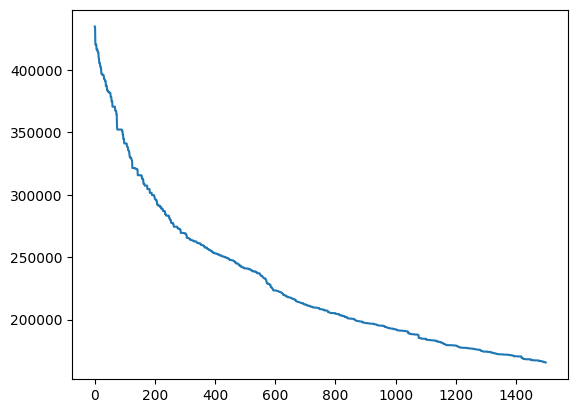

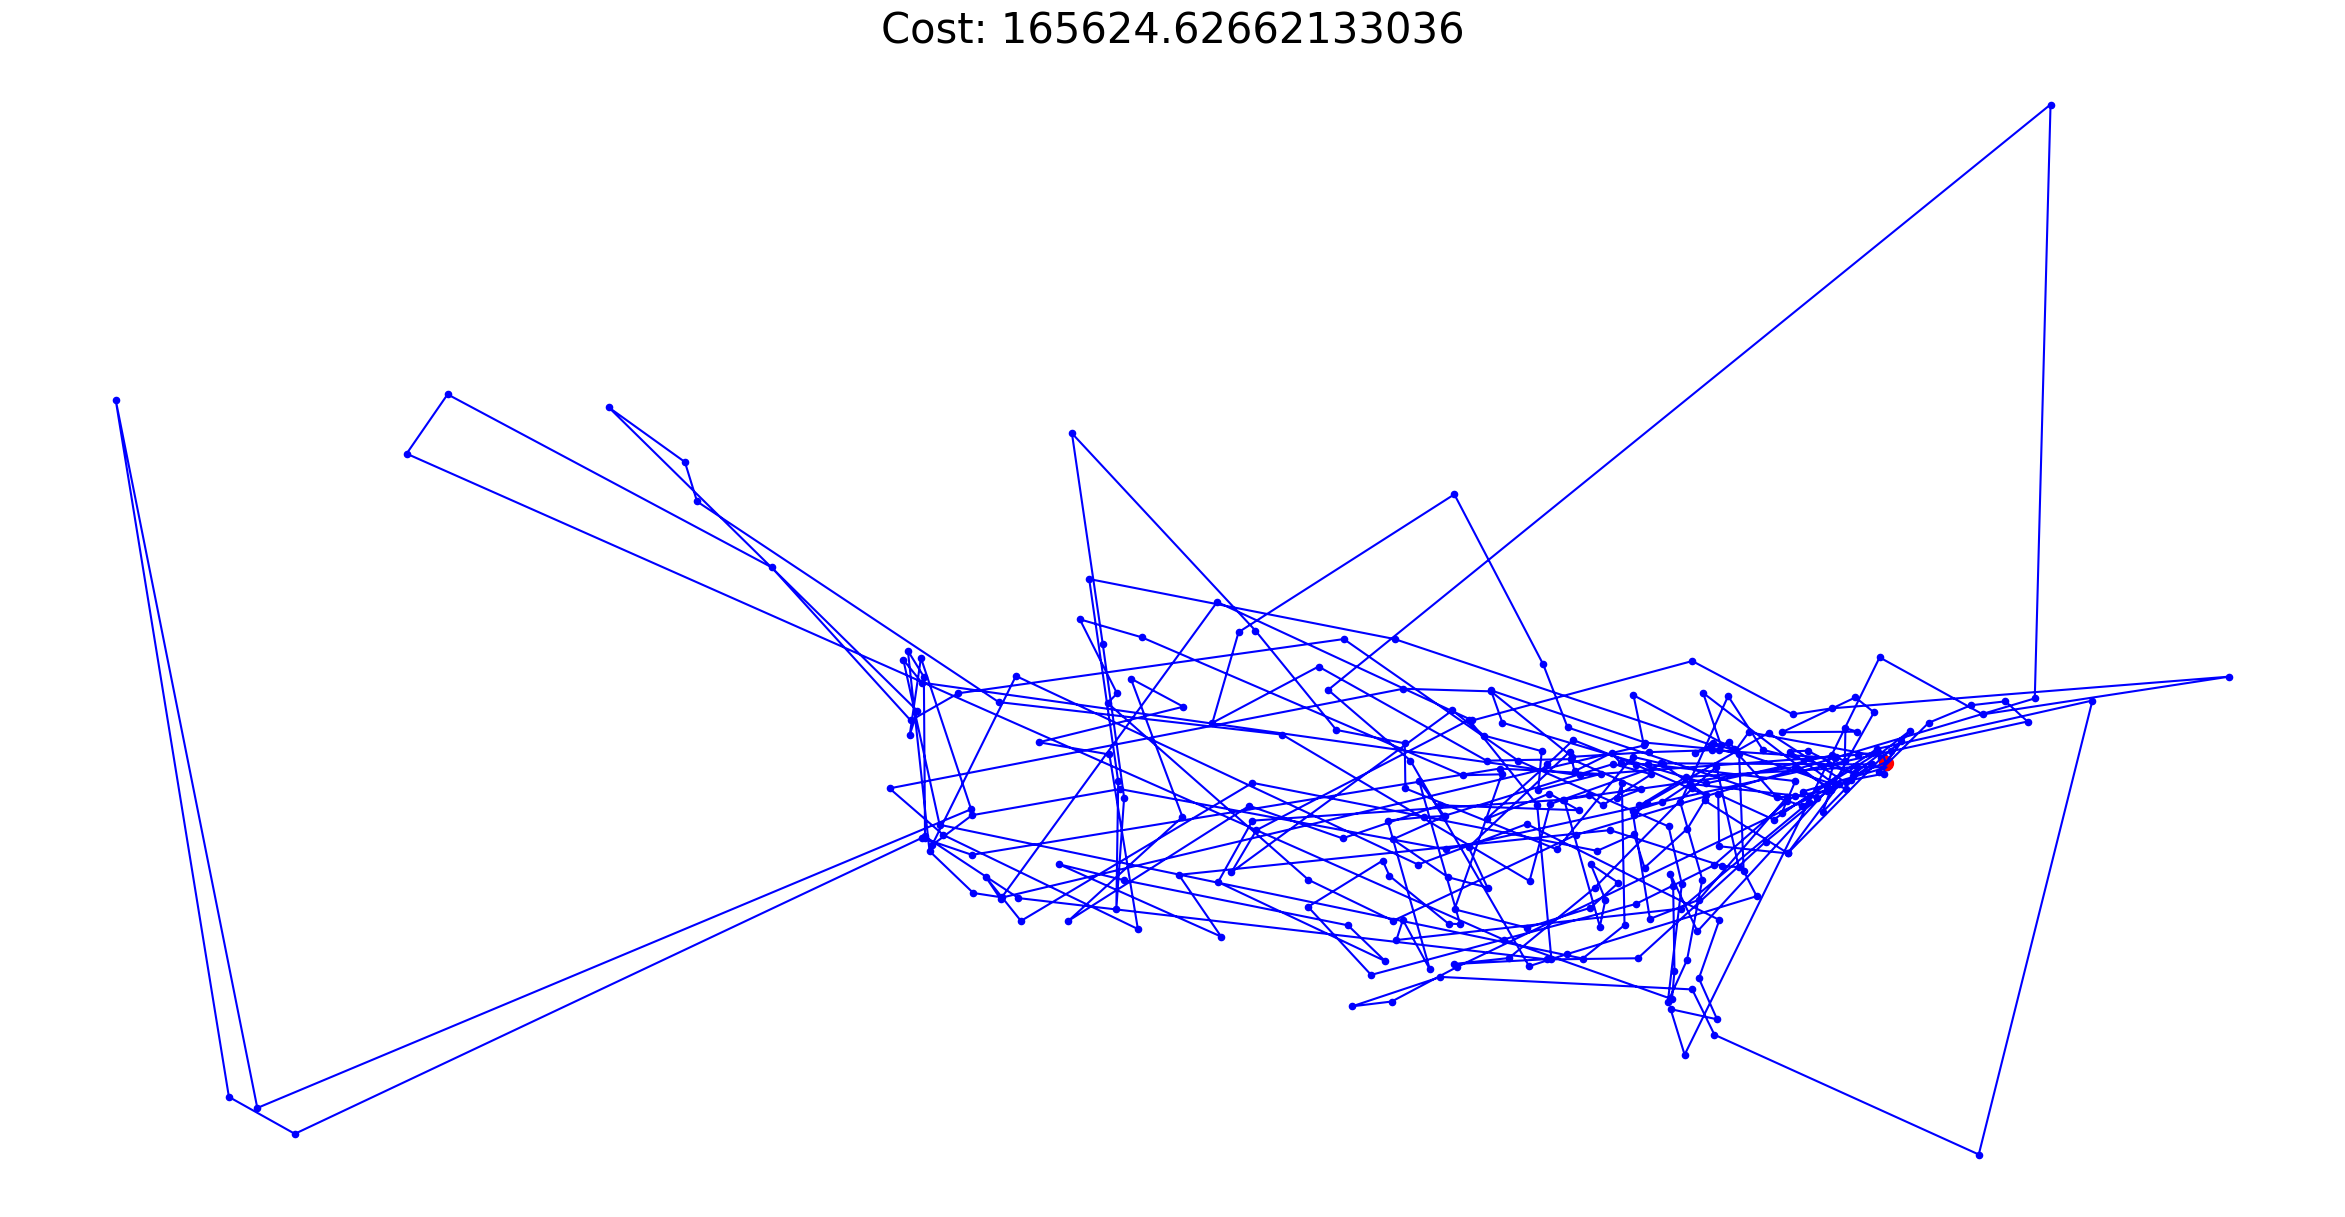

CPU times: user 23min 57s, sys: 3.23 s, total: 24min 1s
Wall time: 24min 15s


In [ ]:
%%time
tour = genetic_algo(G)
C = cost(tour)
plot_tour(tour, coords, C)

# GA with generational replacement instead of steady-state/elitist replacement

In [ ]:
def genetic_algo_genReplace(graph, pop_size=800, n_generations=1500, initial_tour=None, mutation_rate=0.03):
  population = initialise_population(graph, pop_size, initial_tour)
  best_tour = None
  best_cost = float('inf')

  costs = []

  for gen in range(n_generations):
    fitness_scores = calculate_fitness(population)
    parents = roulette_wheel(population, fitness_scores)

    new_population = []
    for i in range(0, pop_size, 2):
      p1, p2 = parents[i], parents[i+1]
      c1 = PMX(p1, p2)
      c2 = PMX(p2, p1)
      c1 = mutate(c1, mutation_rate)
      c2 = mutate(c2, mutation_rate)
      new_population.extend([c1, c2])

    population = new_population

    for tour in population:
            tour_cost = cost(tour)
            if tour_cost < best_cost:
                best_cost = tour_cost
                best_tour = tour

    costs.append(best_cost)
    if gen % 100 == 0 or gen == n_generations - 1:
            print(f"Generation {gen + 1}/{n_generations}: Best cost = {best_cost}")
  plt.plot(costs)
  plt.show()
  return best_tour


Generation 1/1500: Best cost = 434808.58574269497
Generation 101/1500: Best cost = 417214.91670314944
Generation 201/1500: Best cost = 417214.91670314944
Generation 301/1500: Best cost = 417214.91670314944
Generation 401/1500: Best cost = 417214.91670314944
Generation 501/1500: Best cost = 417214.91670314944
Generation 601/1500: Best cost = 417214.91670314944
Generation 701/1500: Best cost = 417214.91670314944
Generation 801/1500: Best cost = 417214.91670314944
Generation 901/1500: Best cost = 417214.91670314944
Generation 1001/1500: Best cost = 417214.91670314944
Generation 1101/1500: Best cost = 417214.91670314944
Generation 1201/1500: Best cost = 417214.91670314944
Generation 1301/1500: Best cost = 416124.6509668048
Generation 1401/1500: Best cost = 416124.6509668048
Generation 1500/1500: Best cost = 416124.6509668048


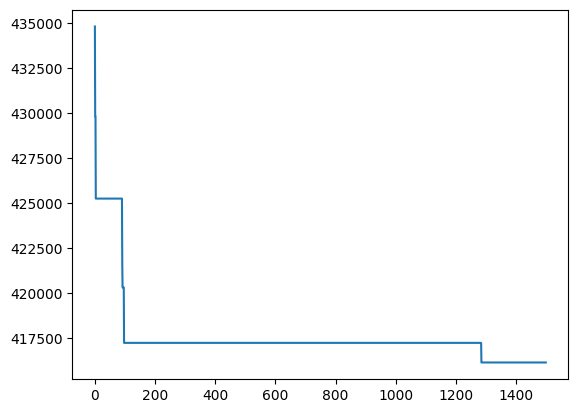

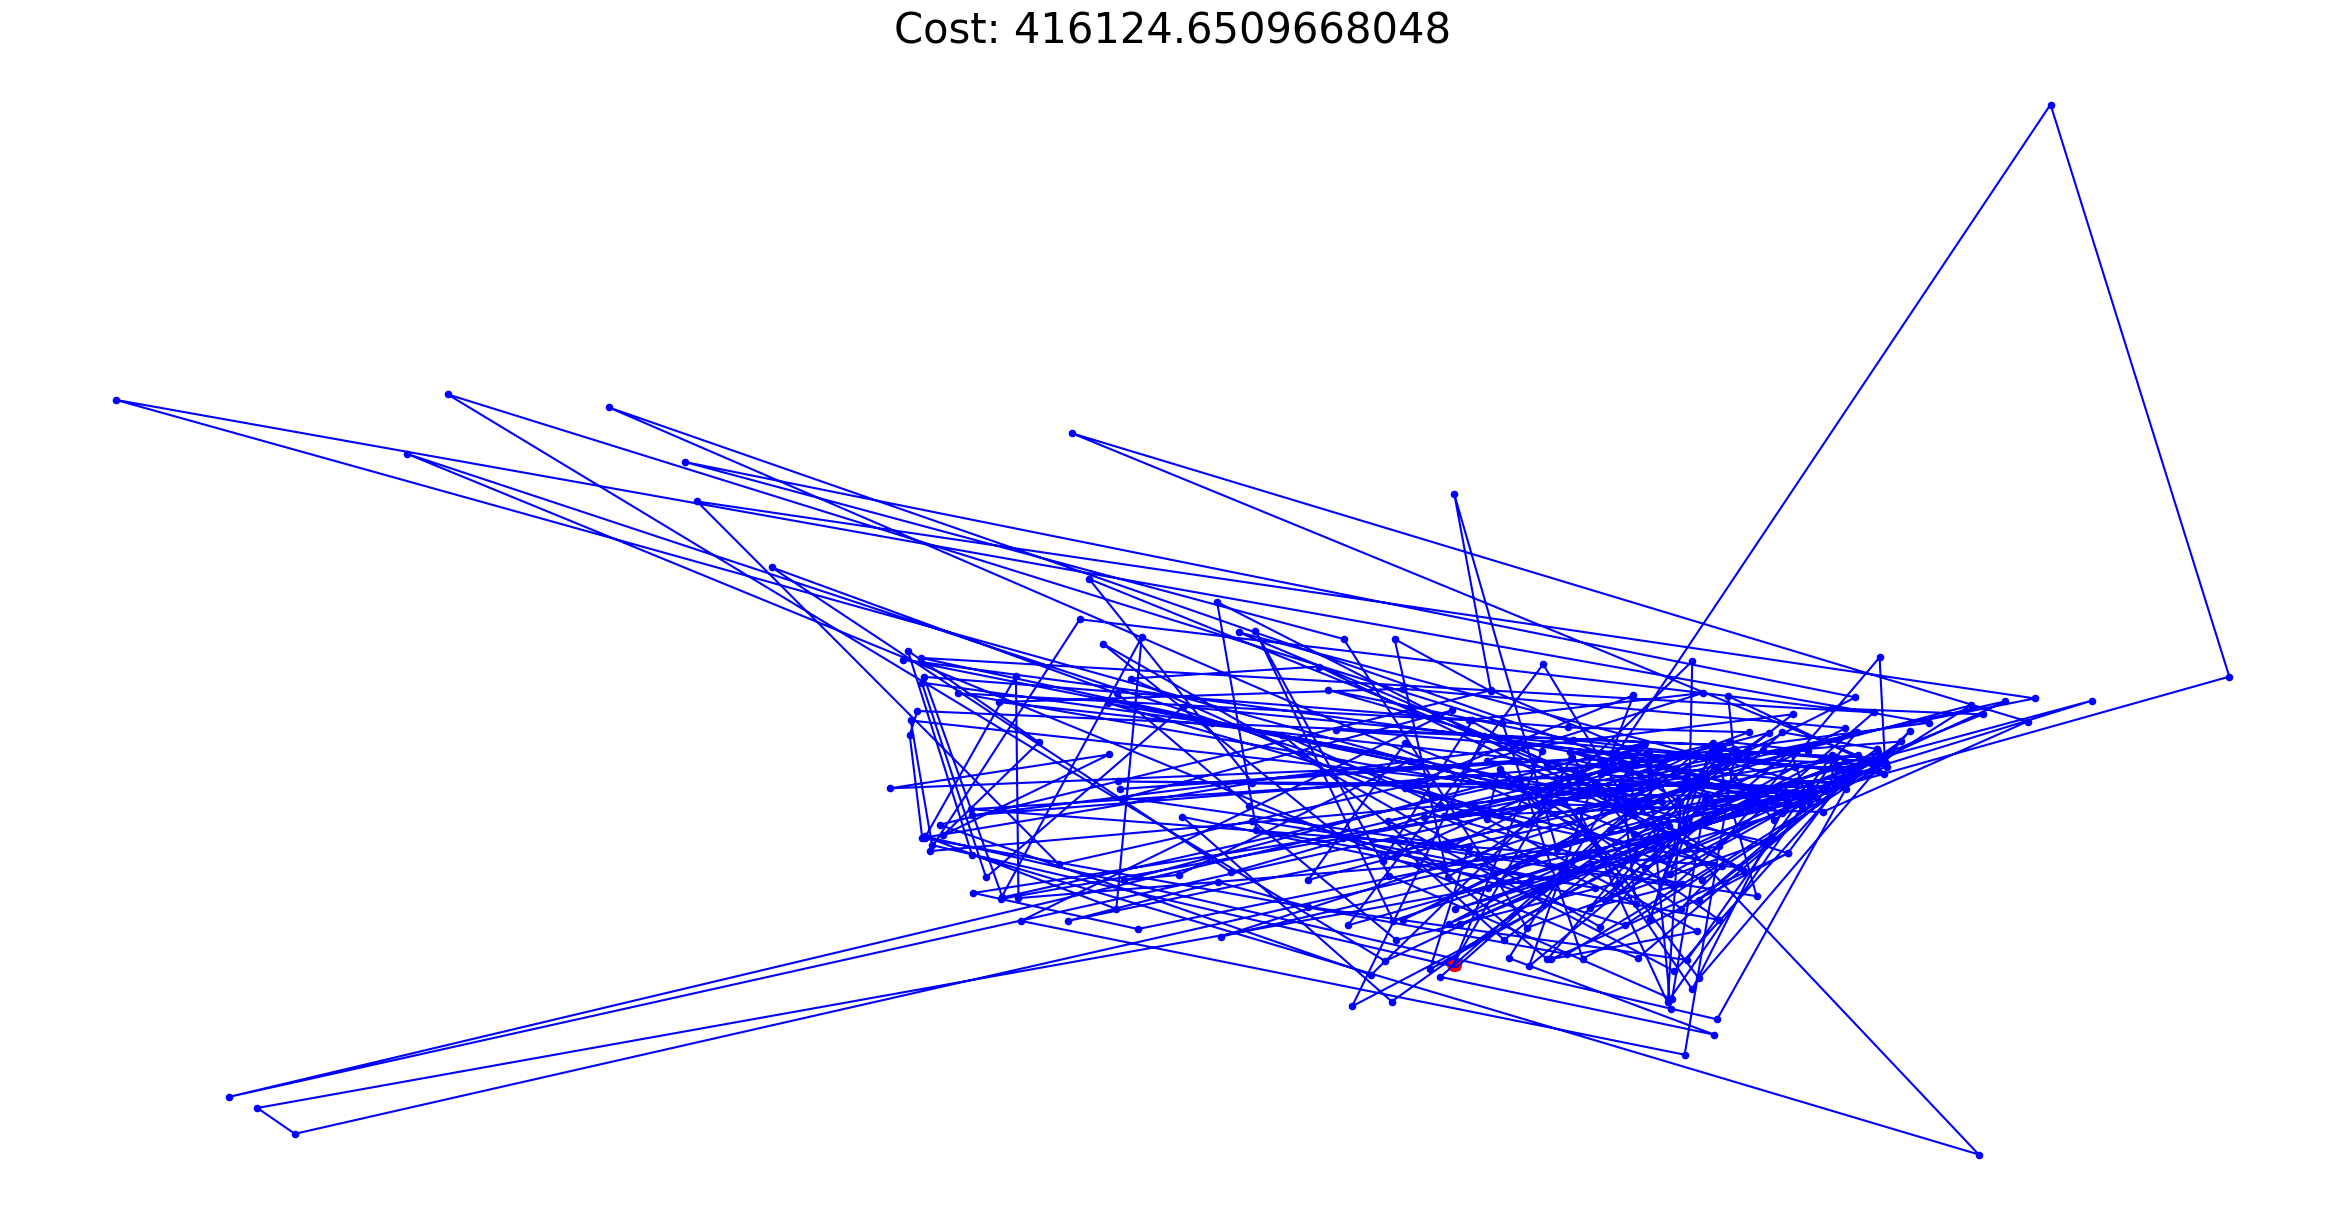

CPU times: user 35min 49s, sys: 4.71 s, total: 35min 54s
Wall time: 36min 17s


In [ ]:
%%time
tour = genetic_algo_genReplace(G)
C = cost(tour)
plot_tour(tour, coords, C)

Given that it is very computationally expensive to find the optimal parameters, I will proceed with a less optimal version of GA for testing.

# PMX vs OX

In [ ]:
def genetic_algo_OX(graph, pop_size=200, n_generations=500, initial_tour=None, mutation_rate=0.03, elite_fraction=0.1):
  population = initialise_population(graph, pop_size, initial_tour)
  best_tour = None
  best_cost = float('inf')
  elite_size = int(elite_fraction * pop_size)

  costs = []

  for gen in range(n_generations):
    fitness_scores = calculate_fitness(population)
    parents = roulette_wheel(population, fitness_scores)

    new_population = []
    for i in range(0, pop_size - elite_size, 2):
      p1, p2 = parents[i], parents[i+1]
      c1 = OX(p1, p2)
      c2 = OX(p2, p1)
      c1 = mutate(c1, mutation_rate)
      c2 = mutate(c2, mutation_rate)
      new_population.extend([c1, c2])

    sorted_population = sorted(population, key=cost)
    elites = sorted_population[:elite_size]

    population = new_population + elites

    for tour in population:
            tour_cost = cost(tour)
            if tour_cost < best_cost:
                best_cost = tour_cost
                best_tour = tour

    costs.append(best_cost)
    if gen % 100 == 0 or gen == n_generations - 1:
            print(f"Generation {gen + 1}/{n_generations}: Best cost = {best_cost}")
  plt.plot(costs)
  plt.show()
  return best_tour


Generation 1/500: Best cost = 447817.70028119144
Generation 101/500: Best cost = 352328.80959080125
Generation 201/500: Best cost = 307375.3066693268
Generation 301/500: Best cost = 272263.82151770423
Generation 401/500: Best cost = 260609.91157239958
Generation 500/500: Best cost = 247032.6410124266


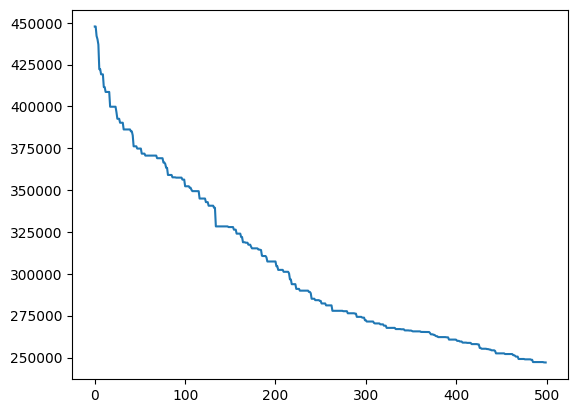

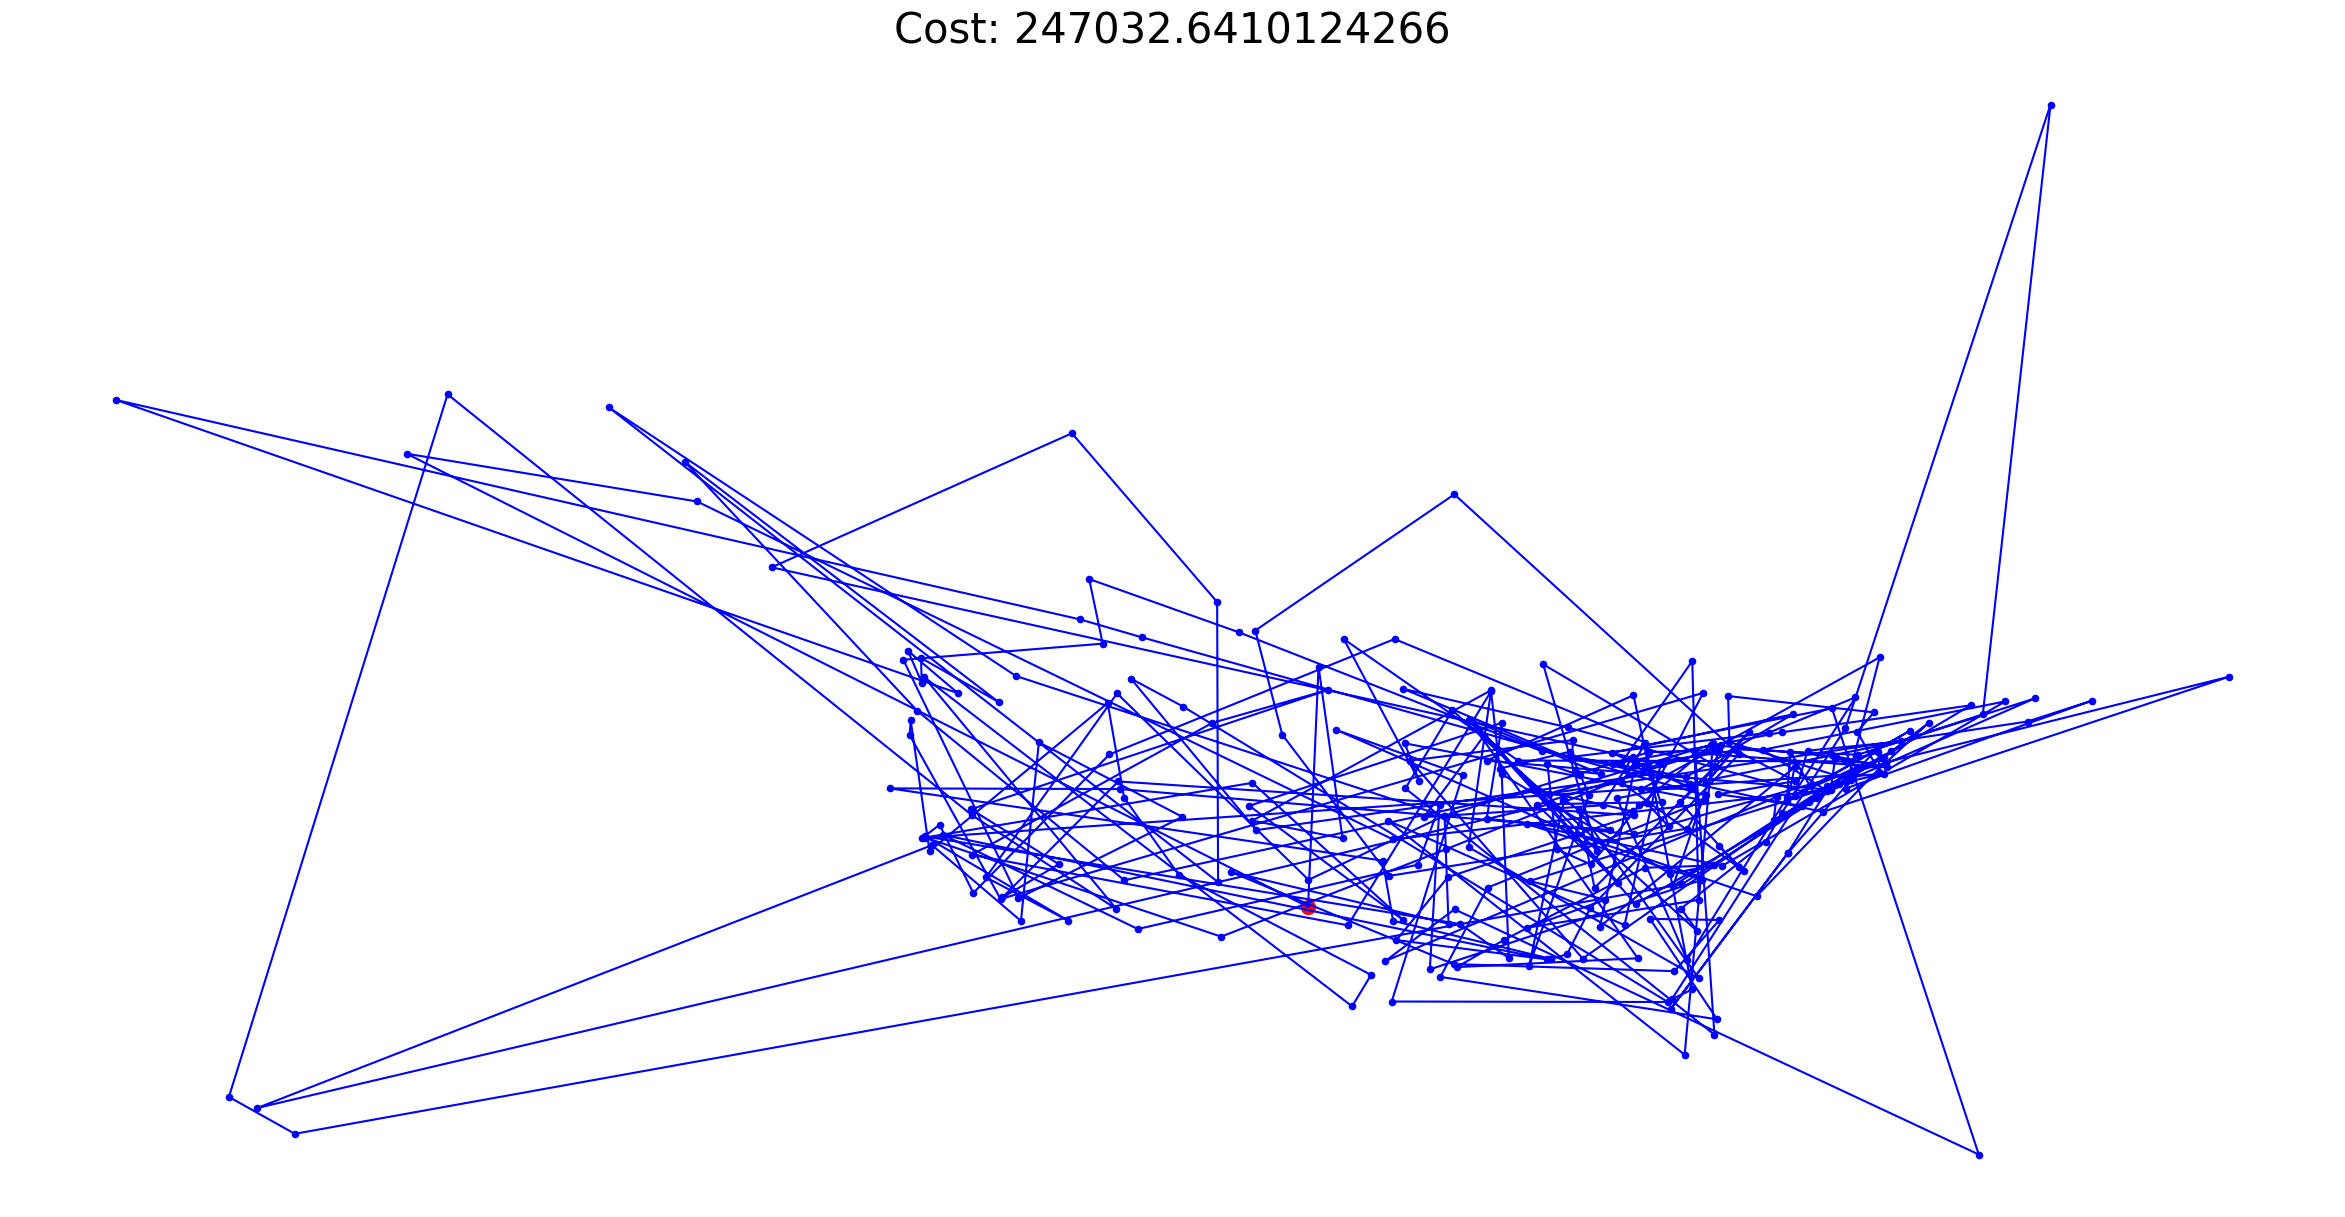

CPU times: user 5min 6s, sys: 841 ms, total: 5min 7s
Wall time: 5min 9s


In [ ]:
%%time
tour = genetic_algo_OX(G)
C = cost(tour)
plot_tour(tour, coords, C)

Generation 1/500: Best cost = 442209.82292415155
Generation 101/500: Best cost = 342567.43803385296
Generation 201/500: Best cost = 299362.13896731636
Generation 301/500: Best cost = 274914.1469022597
Generation 401/500: Best cost = 261299.67588671122
Generation 500/500: Best cost = 247021.03630995532


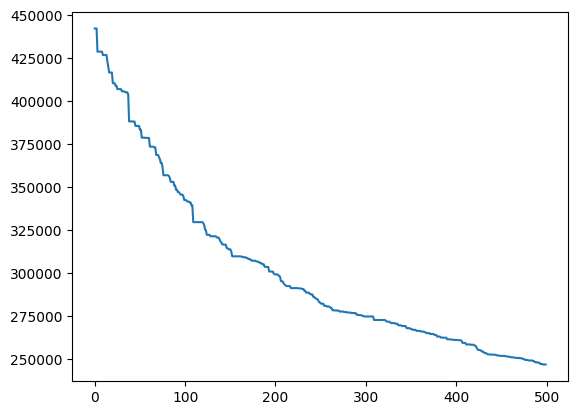

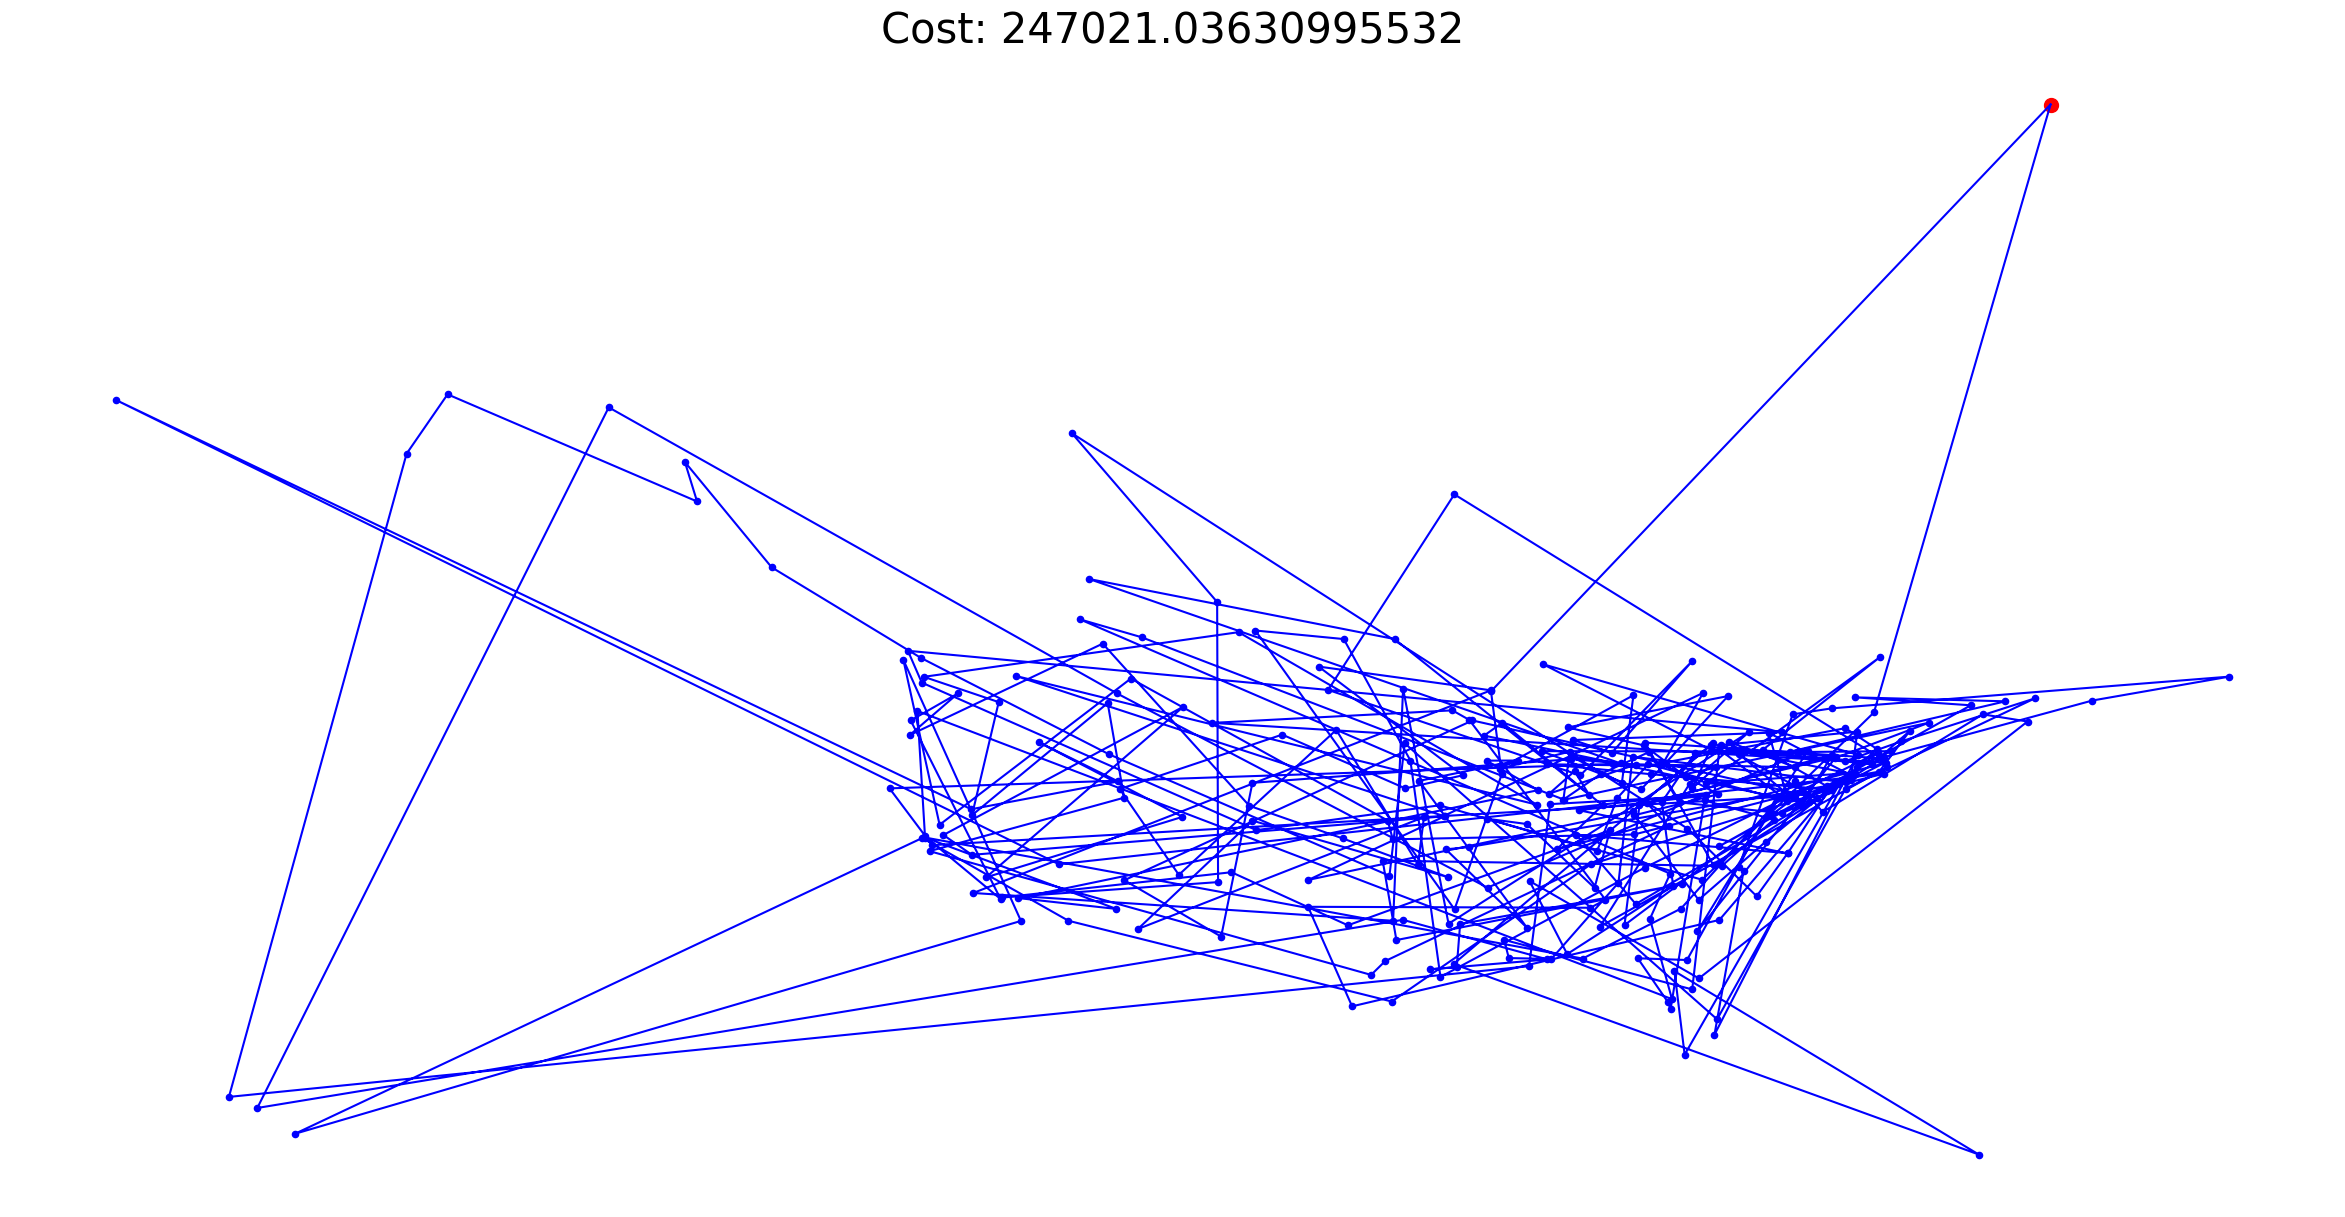

CPU times: user 2min 4s, sys: 457 ms, total: 2min 4s
Wall time: 2min 5s


In [ ]:
%%time
tour = genetic_algo(G, pop_size=200, n_generations=500)
C = cost(tour)
plot_tour(tour, coords, C)

PMX shows slightly better cost but both still far from optimal. OX takes more time but need more testing.

# GA with greedy start

Generation 1/500: Best cost = 442183.2723912143
Generation 101/500: Best cost = 332030.1405380756
Generation 201/500: Best cost = 295211.80500045174
Generation 301/500: Best cost = 275986.49656083883
Generation 401/500: Best cost = 263590.9718410223
Generation 500/500: Best cost = 250193.09718759655


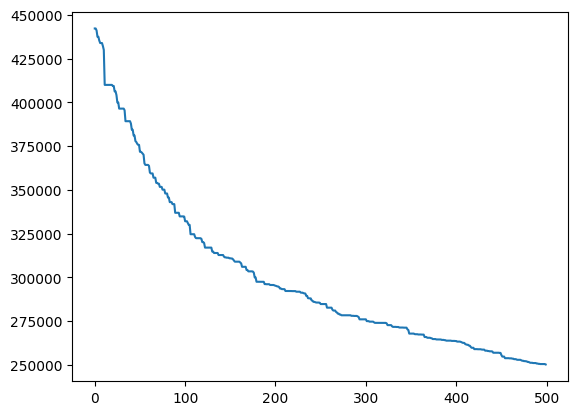

Cost: 250193.09718759655
CPU times: user 1min 8s, sys: 281 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
%%time
tour = genetic_algo(G, pop_size=200, n_generations=500, initial_tour=greedy_heap_tsp(G))
C = cost(tour)
print(f"Cost: {C}")

## Increase mutation rate to 0.05

Generation 1/500: Best cost = 444172.3264728682
Generation 101/500: Best cost = 342079.8623053746
Generation 201/500: Best cost = 285855.1472464293
Generation 301/500: Best cost = 267026.4808155257
Generation 401/500: Best cost = 249698.2854023747
Generation 500/500: Best cost = 230803.07021949656


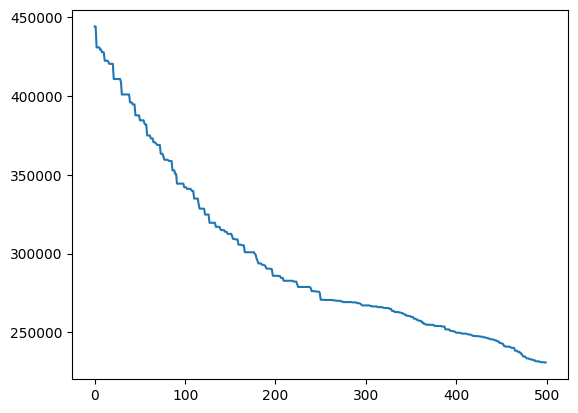

Cost: 230803.07021949656
CPU times: user 1min 10s, sys: 294 ms, total: 1min 11s
Wall time: 1min 11s


In [ ]:
%%time
tour = genetic_algo(G, pop_size=200, n_generations=500, initial_tour=greedy_heap_tsp(G), mutation_rate=0.05)
C = cost(tour)
print(f"Cost: {C}")

# GA with 2opt

In [ ]:
def genetic_algo_2opt(graph, pop_size=800, n_generations=1500, initial_tour=None, mutation_rate=0.03, elite_fraction=0.1):
  population = initialise_population(graph, pop_size, initial_tour)
  best_tour = None
  best_cost = float('inf')
  elite_size = int(elite_fraction * pop_size)

  costs = []

  for gen in range(n_generations):
    fitness_scores = calculate_fitness(population)
    parents = roulette_wheel(population, fitness_scores)

    new_population = []
    for i in range(0, pop_size - elite_size, 2):
      p1, p2 = parents[i], parents[i+1]
      c1 = PMX(p1, p2)
      c2 = PMX(p2, p1)

      c1 = two_opt(c1, graph)
      c2 = two_opt(c2, graph)

      c1 = mutate(c1, mutation_rate)
      c2 = mutate(c2, mutation_rate)
      new_population.extend([c1, c2])

    sorted_population = sorted(population, key=cost)
    elites = sorted_population[:elite_size]

    population = new_population + elites

    for tour in population:
            tour_cost = cost(tour)
            if tour_cost < best_cost:
                best_cost = tour_cost
                best_tour = tour

    costs.append(best_cost)
    print(f"Generation {gen + 1}/{n_generations}: Best cost = {best_cost}")
  plt.plot(costs)
  plt.show()
  return best_tour


Generation 1/10: Best cost = 48103.889104667236
Generation 2/10: Best cost = 48103.889104667236
Generation 3/10: Best cost = 47968.63746814598
Generation 4/10: Best cost = 47774.55970223143
Generation 5/10: Best cost = 47774.55970223143
Generation 6/10: Best cost = 47774.55970223143
Generation 7/10: Best cost = 47740.270239151265
Generation 8/10: Best cost = 47650.78743832839
Generation 9/10: Best cost = 47253.940654902326
Generation 10/10: Best cost = 47253.940654902326


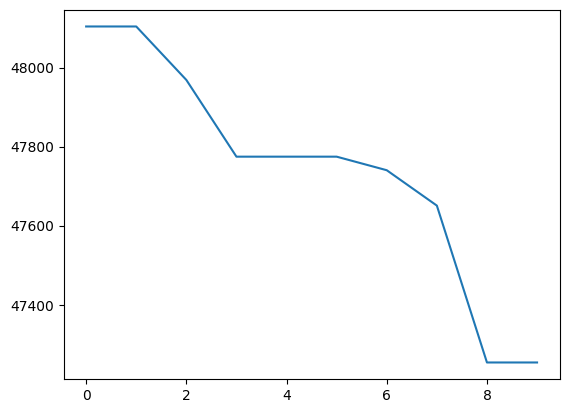

Cost: 47253.940654902326
CPU times: user 13min 36s, sys: 1.5 s, total: 13min 37s
Wall time: 13min 44s


In [ ]:
%%time
tour = genetic_algo_2opt(G, pop_size=200, n_generations=10, initial_tour=greedy_heap_tsp(G), mutation_rate=0.05)
C = cost(tour)
print(f"Cost: {C}")

# PyConcorde

In [ ]:
!git clone https://github.com/jvkersch/pyconcorde

Cloning into 'pyconcorde'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 418 (delta 207), reused 385 (delta 192), pack-reused 0 (from 0)
Receiving objects: 100% (418/418), 3.54 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [ ]:
cd pyconcorde

/content/pyconcorde


In [ ]:
!pip install -e .

Obtaining file:///content/pyconcorde
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.2 MB/s eta 0:00:00
  Building editable for pyconcorde (pyproject.toml) ... done
  Created wheel for pyconcorde: filename=pyconcorde-0.1.0-0.editable-cp310-cp310-linux_x86_64.whl size=3897 sha256=b5b196506b4ac8da01e188512ba403a40ab9db24b6130db27591764bf290bd04
  Stored in directory: /tmp/pip-ephem-wheel-cache-of82s9kk/wheels/30/8f/f8/baf479acd96e33ee68ba2acd29c1f1ae051ed8eaddc8bcd594
Successfully built pyconcorde
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      S

In [ ]:
from concorde.tsp import TSPSolver

Cost: 46008.74875689601


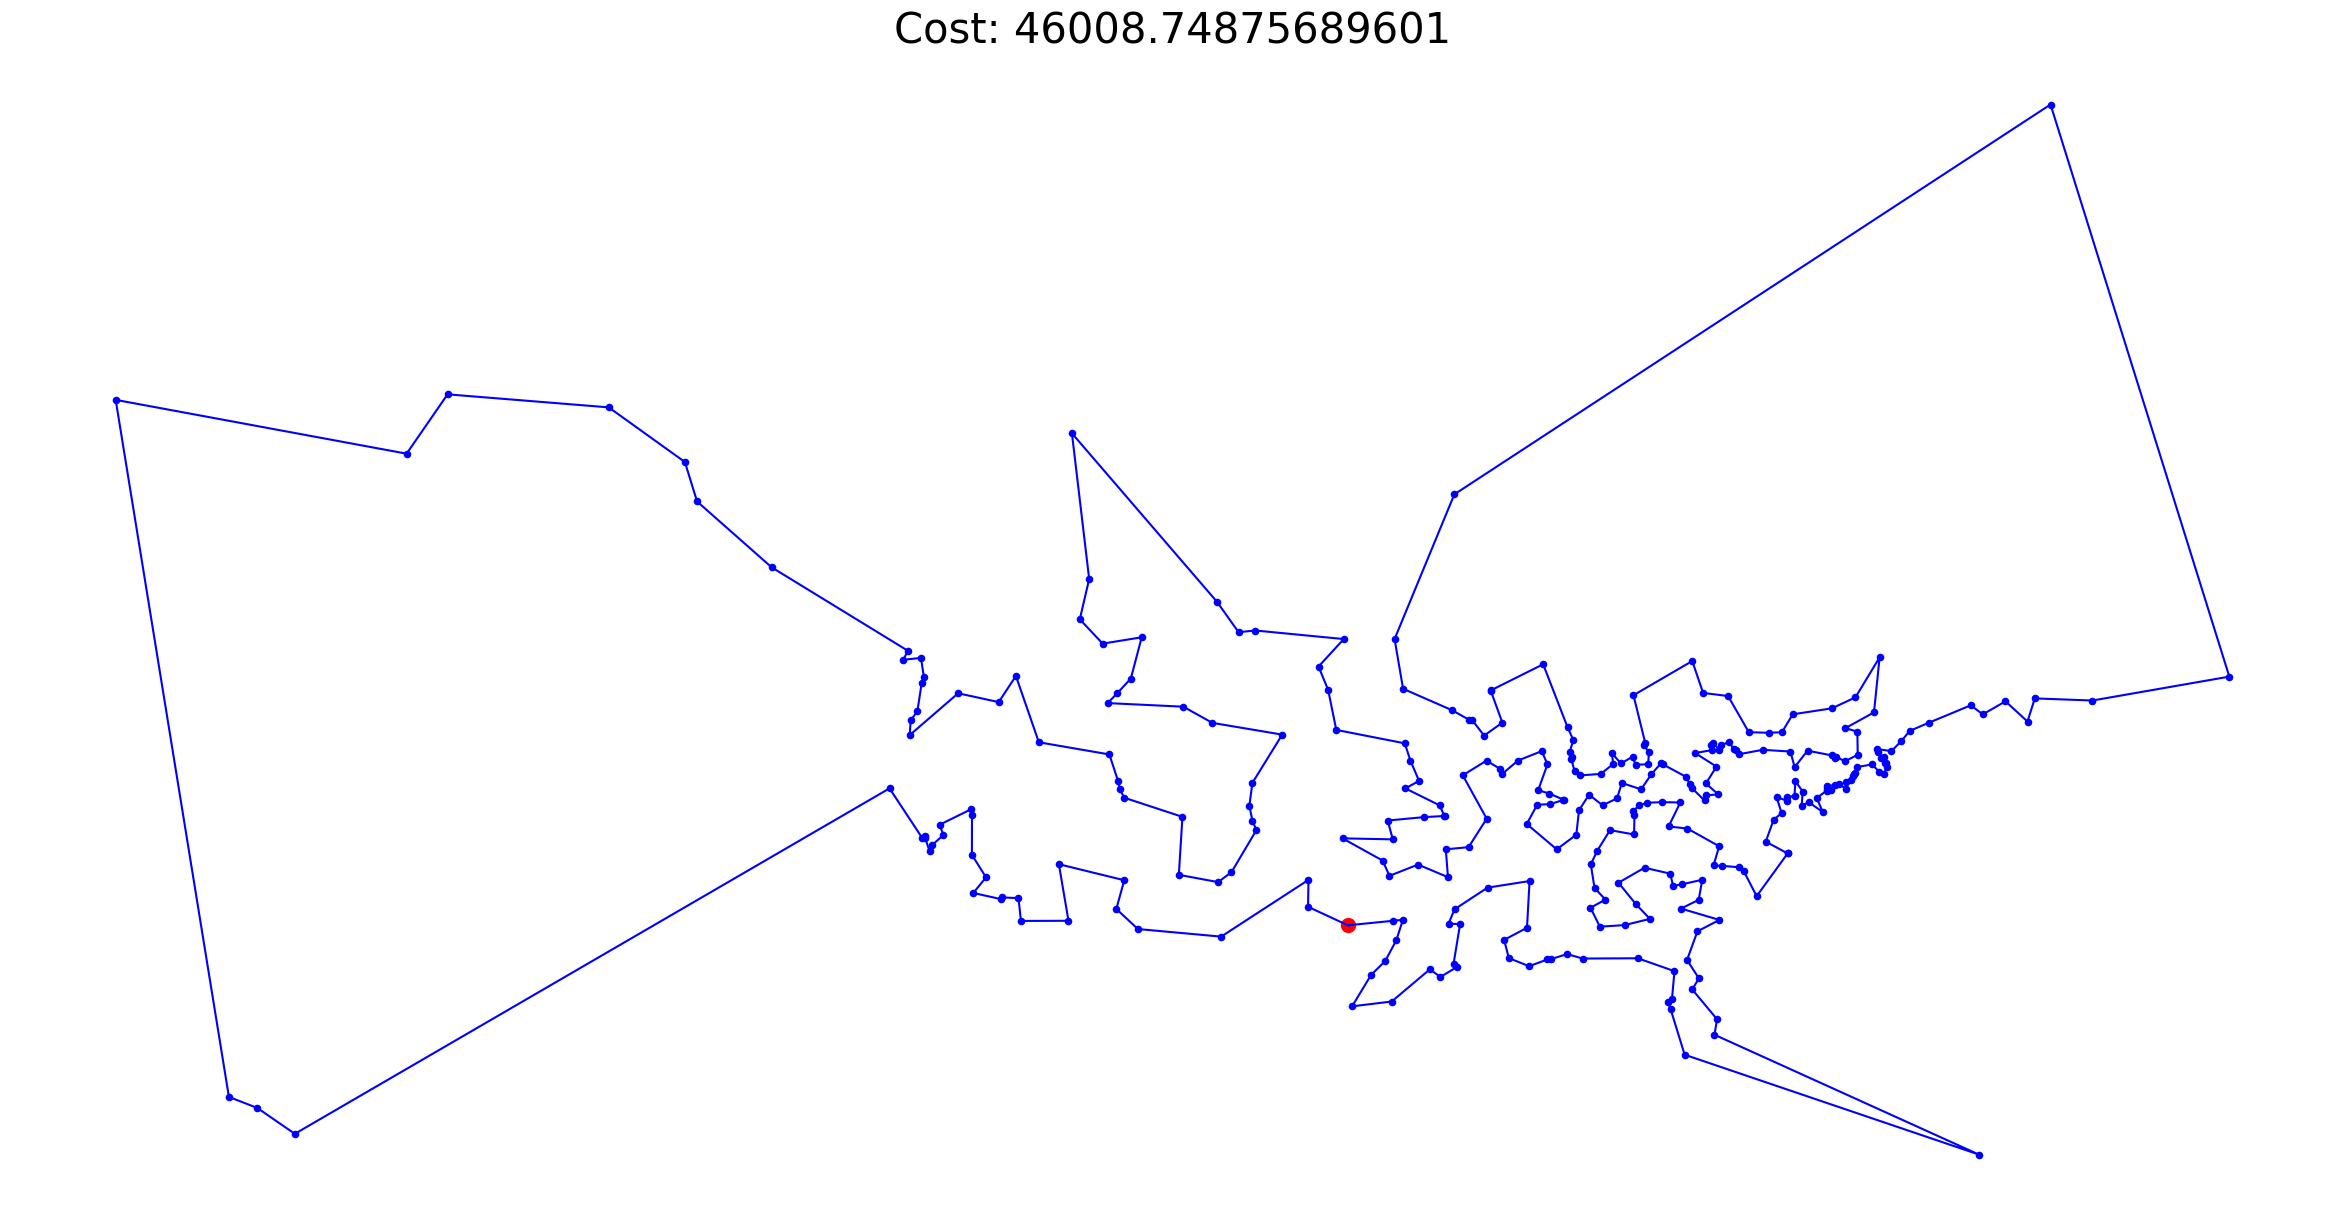

CPU times: user 6.42 s, sys: 630 ms, total: 7.05 s
Wall time: 7.56 s


In [ ]:
%%time
x, y = coords[:,0], coords[:,1]
solver = TSPSolver.from_data(x, y, norm="EUC_2D")
solution = solver.solve()

C = cost(solution.tour)
print(f"Cost: {C}")
plot_tour(solution.tour, coords, C)

To confirm performance of PyConcorde we will use again att48. Cost of 33523 is consistent with

In [ ]:
coords= load_coord('/content/drive/MyDrive/att48_xy.txt')
G = load_distMatrix(coords)

Cost: 33523.7085074356


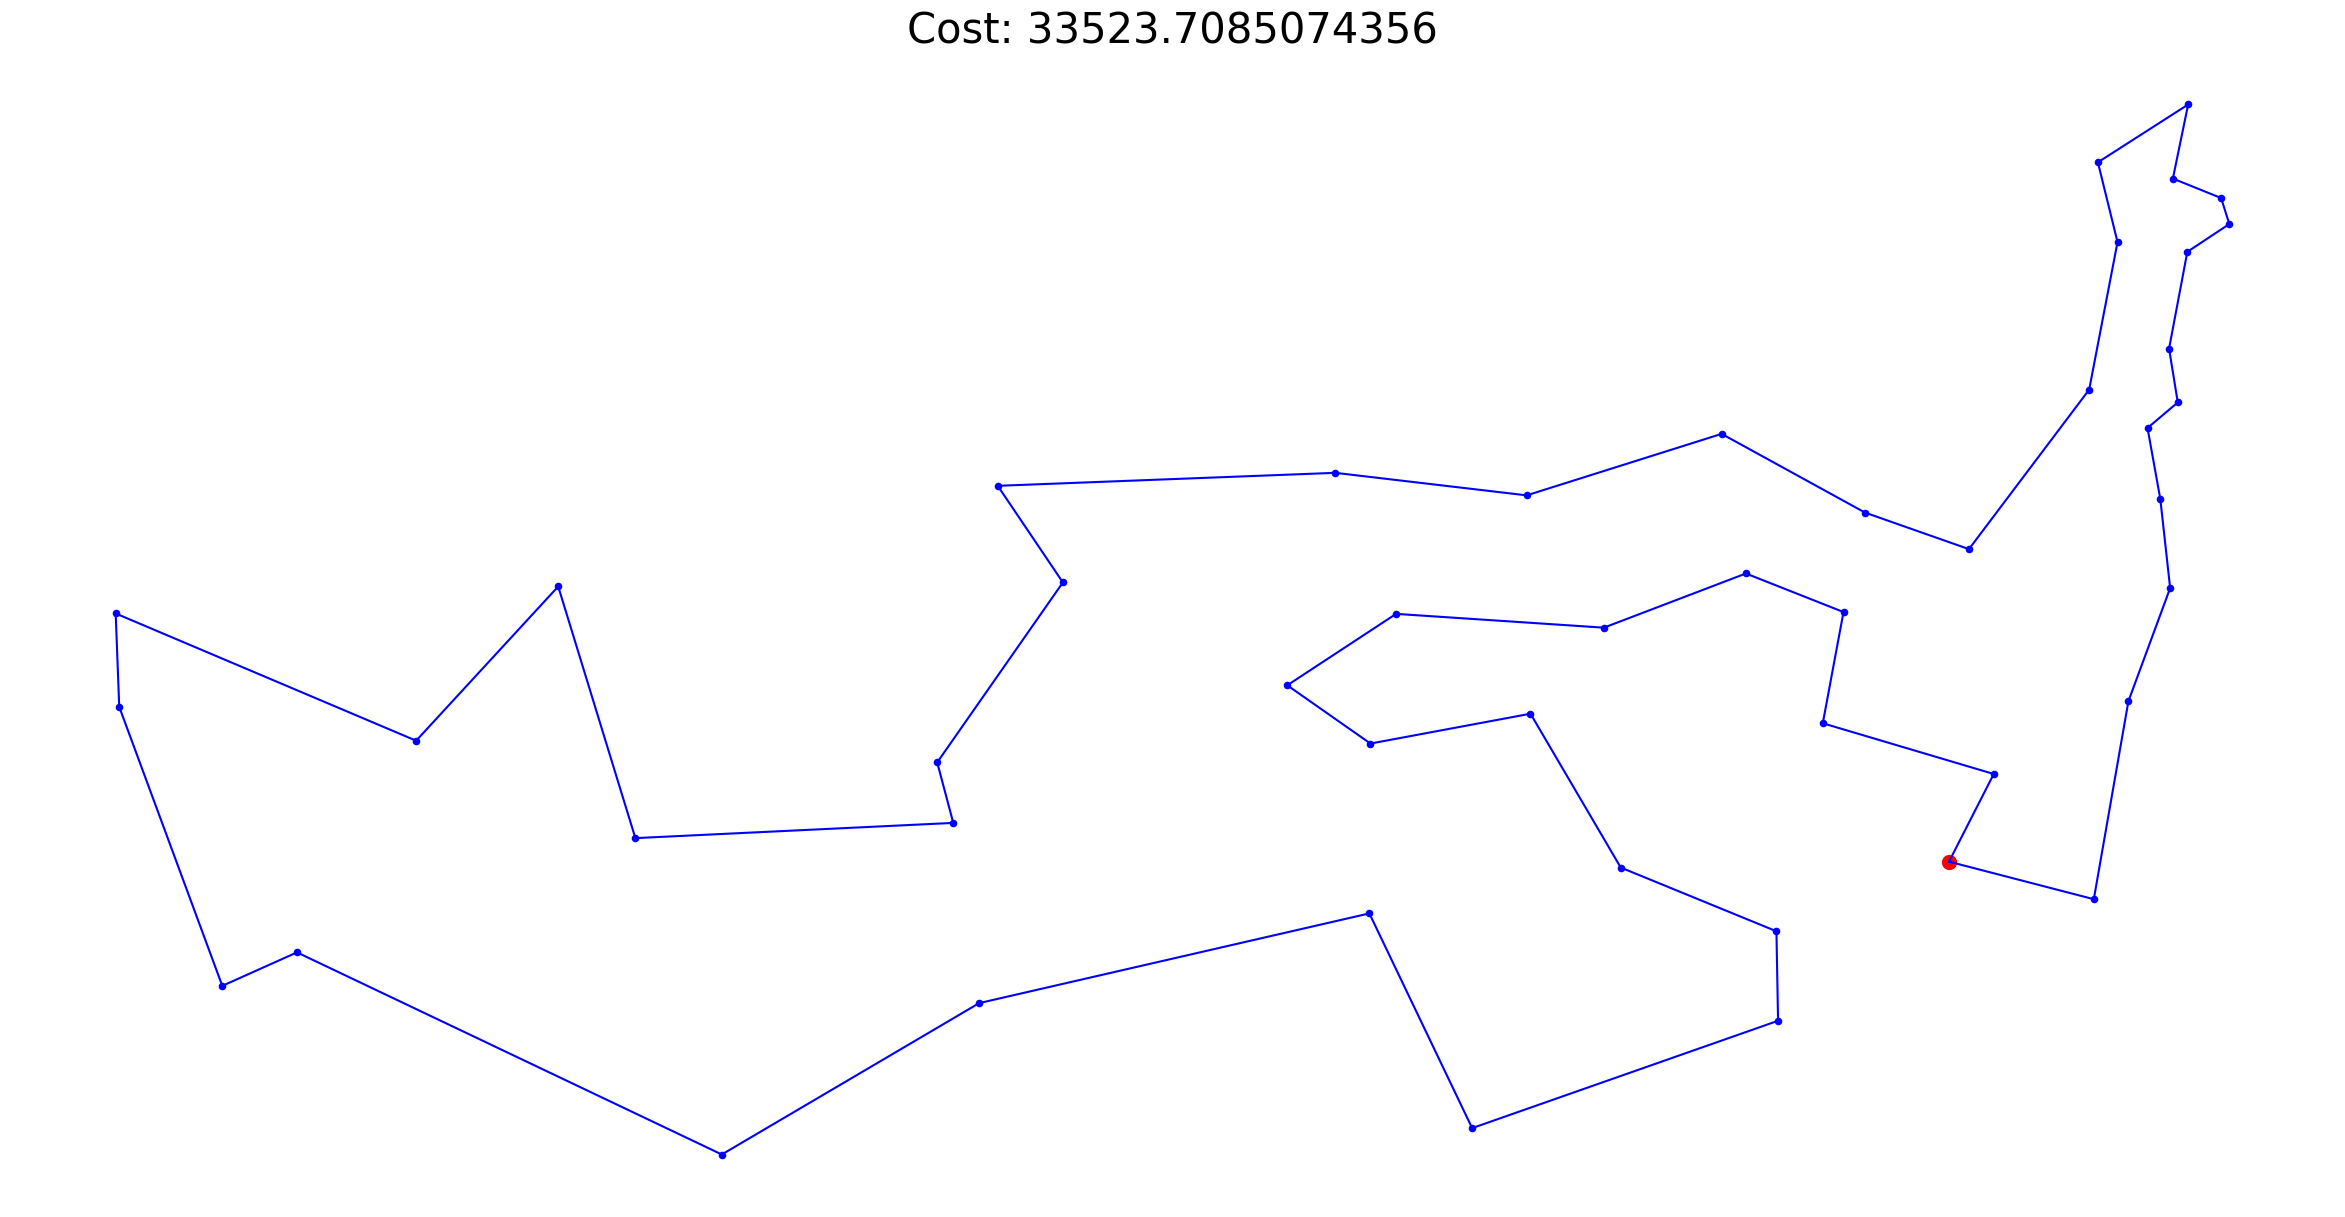

CPU times: user 626 ms, sys: 139 ms, total: 765 ms
Wall time: 816 ms


In [ ]:
%%time
x, y = coords[:,0], coords[:,1]
solver = TSPSolver.from_data(x, y, norm="EUC_2D")
solution = solver.solve()

C = cost(solution.tour)
print(f"Cost: {C}")
plot_tour(solution.tour, coords, C)